# Supplementary Information for Element Similarity

In [1]:
# Imports
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple
from elementembeddings.core import Embedding, data_directory
from elementembeddings.plotter import dimension_plotter, heatmap_plotter
import pandas as pd
import os
import seaborn as sns

sns.set_context("paper", font_scale=1.5)

/home/antobi/miniconda3/envs/atomic_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set up the 7 embeddings
cbfvs = [
    "magpie_sc",
    "mat2vec",
      "megnet16",
    "random_200",
    "matscholar",
    "oliynyk_sc",
    "skipatom",
]
element_embedddings = {cbfv: Embedding.load_data(cbfv) for cbfv in cbfvs}

In [3]:
# Get the ordered symbols file
symbols_path = os.path.join(data_directory, "element_data", "ordered_periodic.txt")
with open(symbols_path) as f:
    symbols = f.read().splitlines()

# Get the first 83 elements
symbols = symbols[:83]

for cbfv in element_embedddings.keys():
    # Get the keys of the atomic embeddings object
    elements = set(element_embedddings[cbfv].element_list)
    el_symbols_set = set(symbols)

    # Get the element symbols we want to remove
    els_to_remove = list(elements - el_symbols_set)

    # Iteratively delete the elements with atomic number
    # greater than 83 from our embeddings
    for el in els_to_remove:
        del element_embedddings[cbfv].embeddings[el]

    # Verify that we have 83 elements
    print(len(element_embedddings[cbfv].element_list))

# Remove Xe and Kr from SkipAtom
#del element_embedddings["skipatom"].embeddings["Xe"]
#del element_embedddings["skipatom"].embeddings["Kr"]

83
83
83
83
83
83
80


## Similarity measures


### Euclidean distance


/tmp/ipykernel_29037/4048799798.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


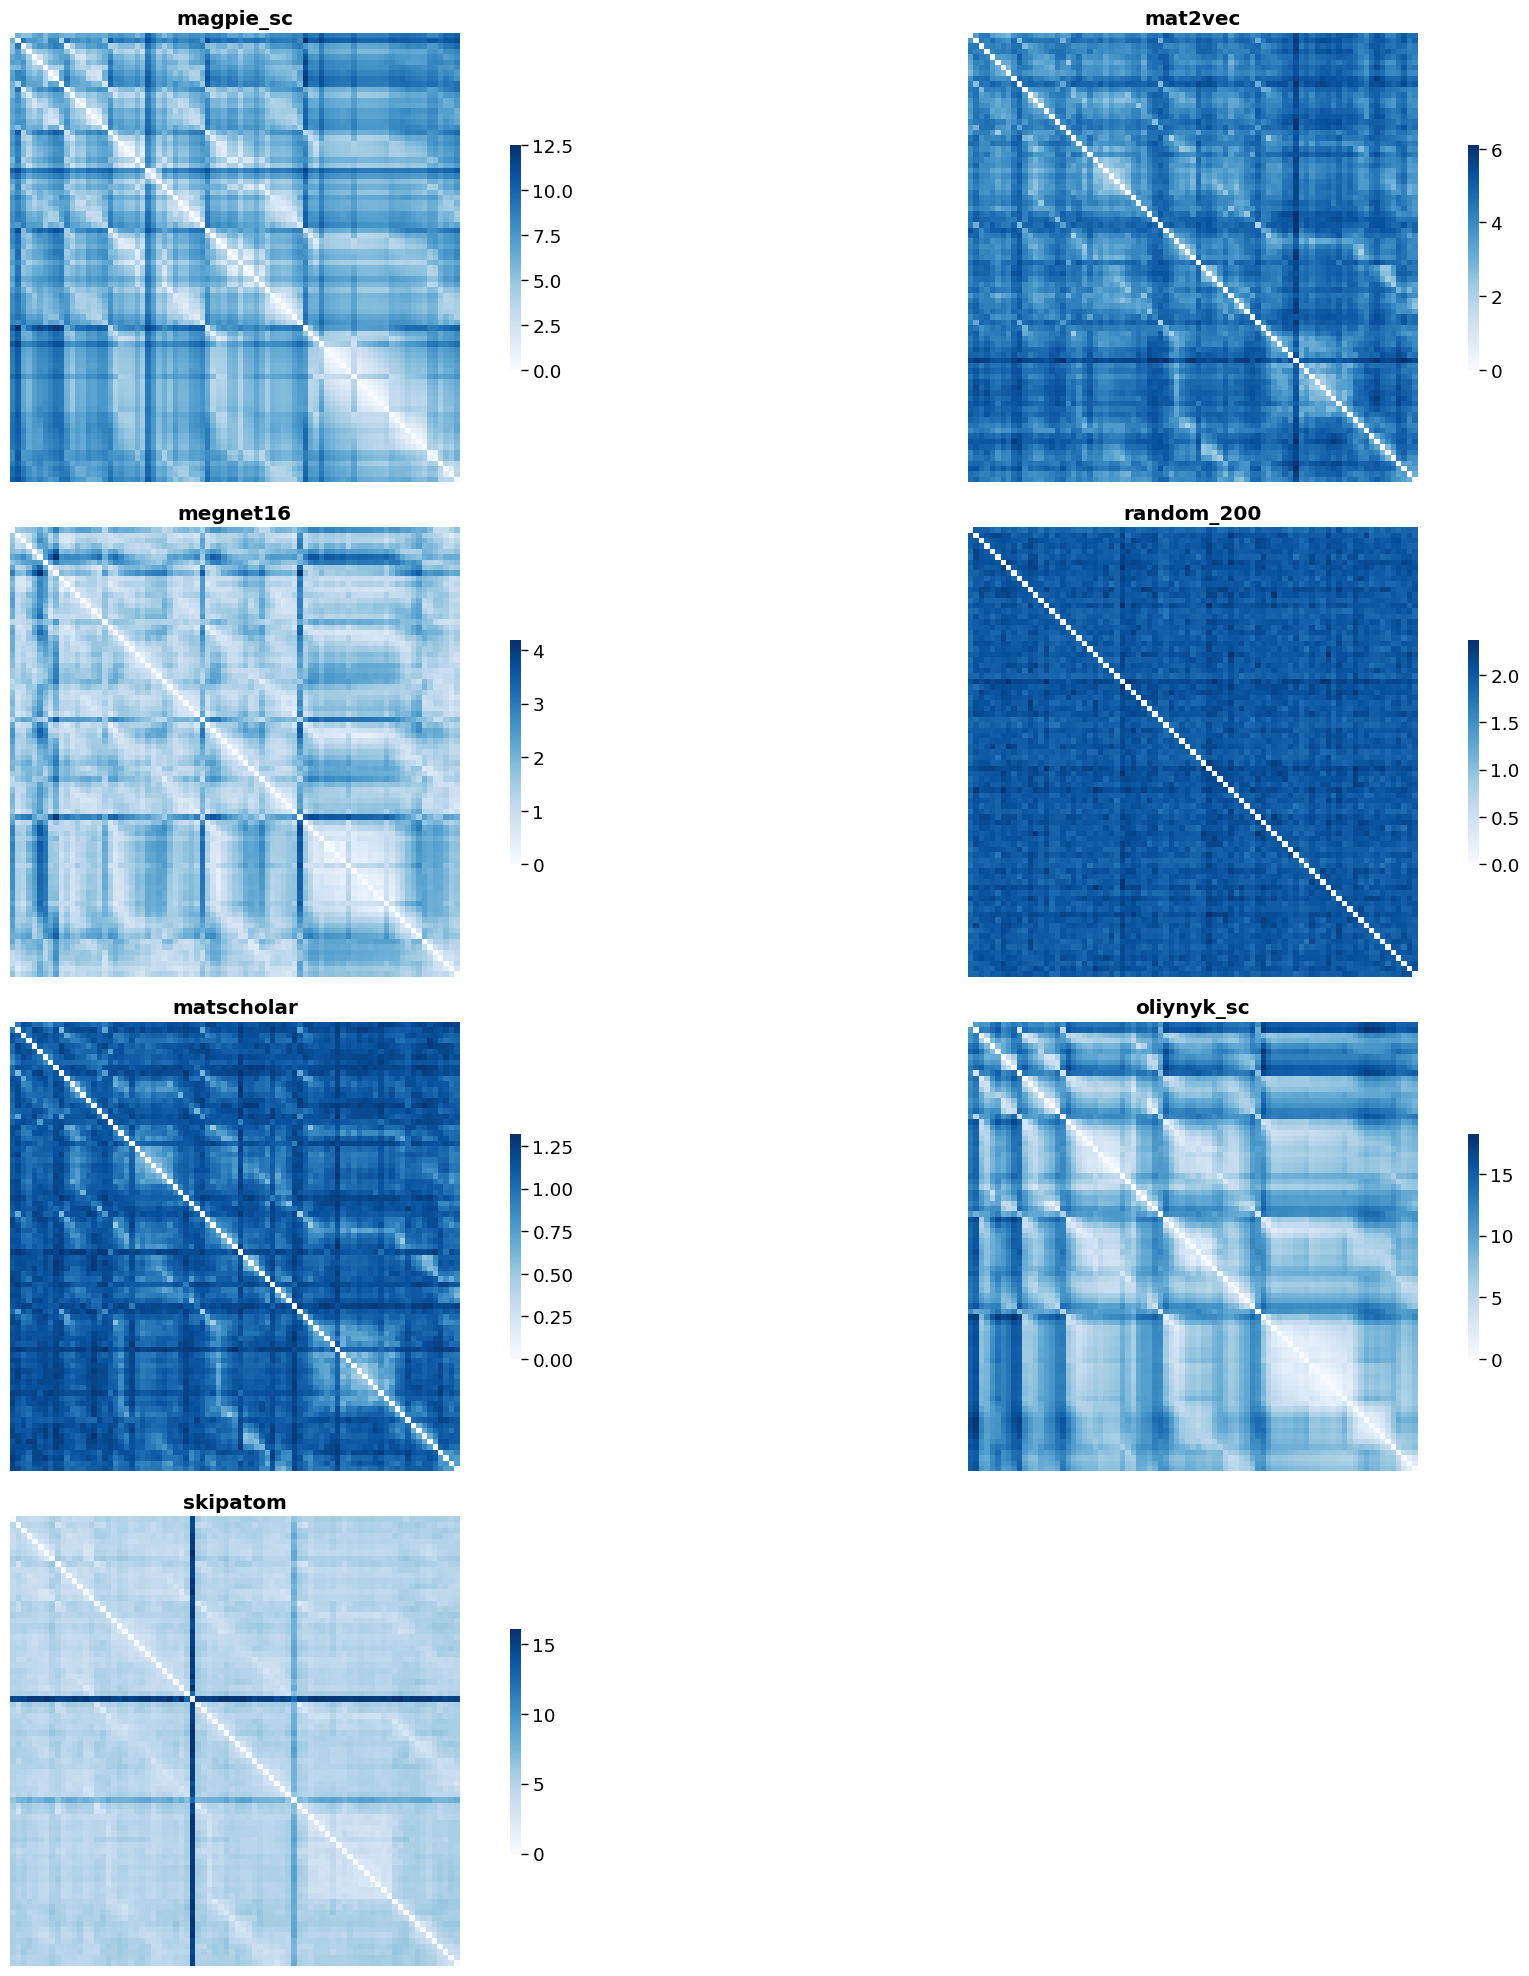

In [4]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="euclidean",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_euclidean.pdf", bbox_inches="tight")
fig.show()

#### Skipatom

From the above plot, we can observe two element vectors causing anomalous behaviour in the skipatom plot. We plot the skipatom map with the axis labelled to determine which elements are causing this behaviour.

/tmp/ipykernel_29037/2231997922.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


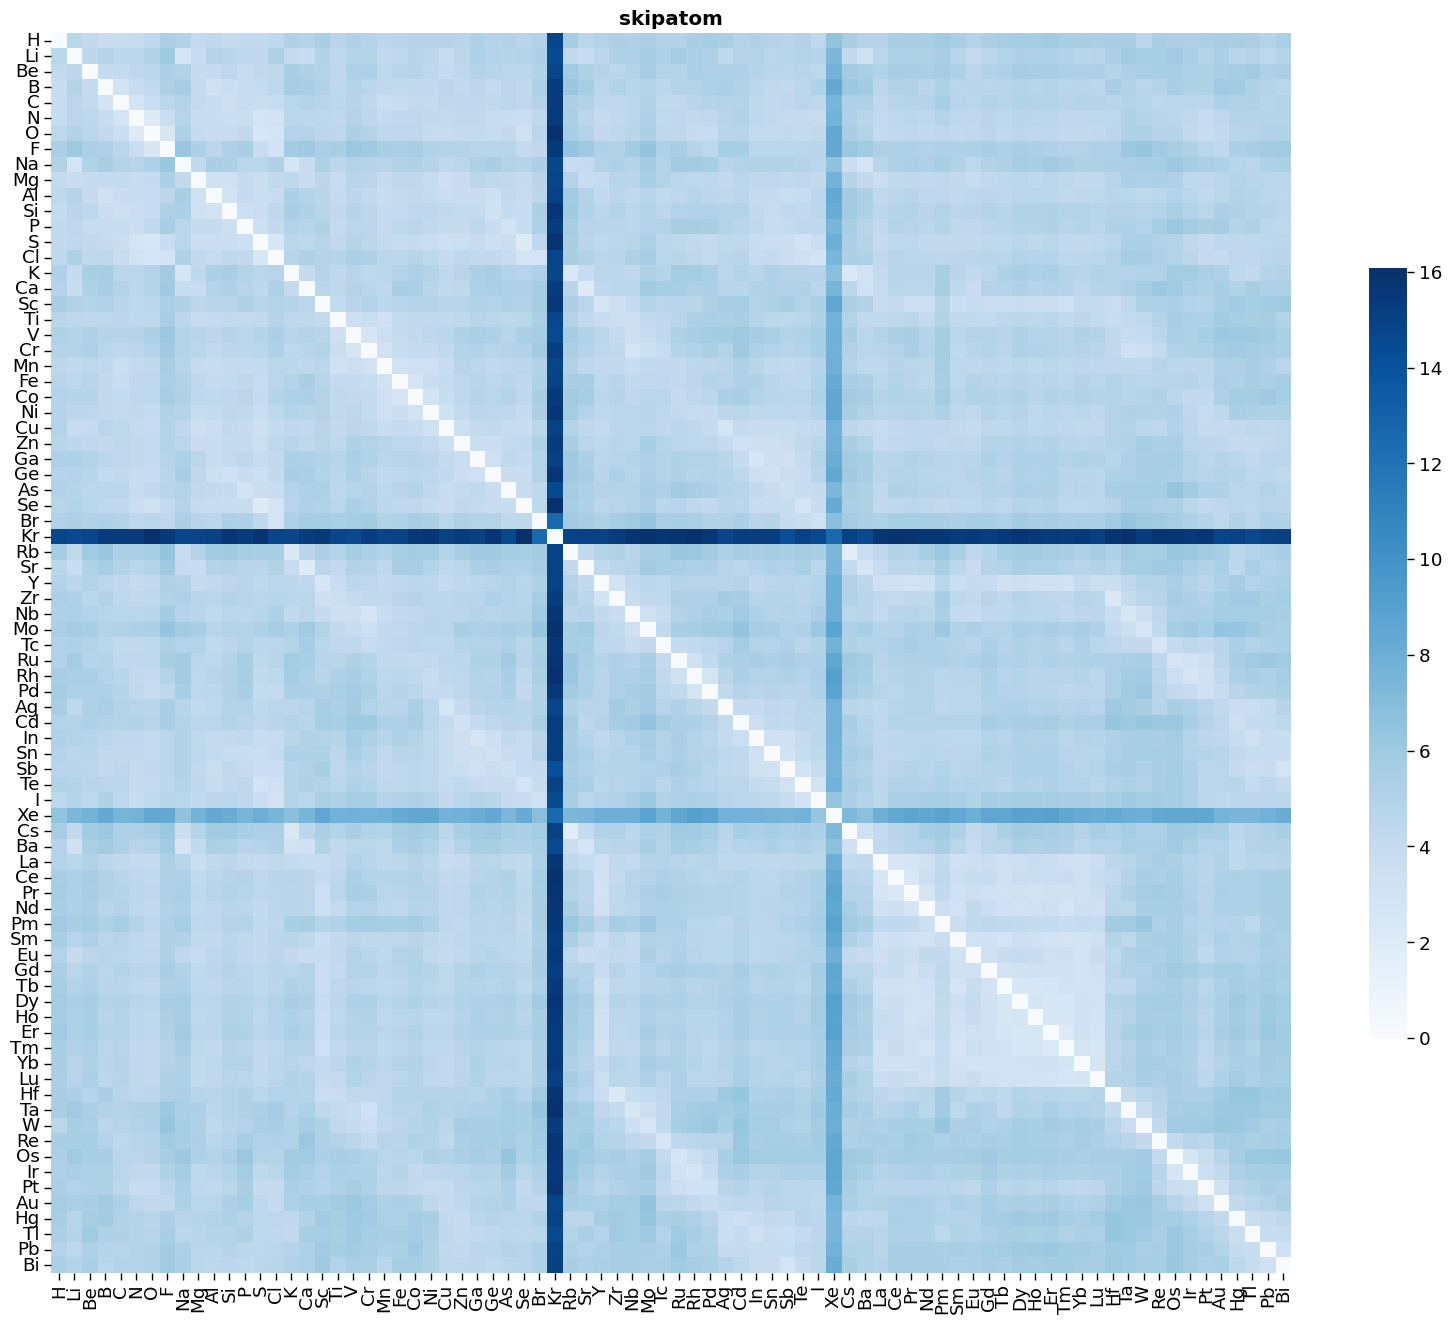

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
heatmap_plotter(
    embedding=element_embedddings["skipatom"],
    metric="euclidean",
    sortaxisby="atomic_number",
    show_axislabels=True,
    ax=ax,
)

fig.show()

### Manhattan distance

/tmp/ipykernel_29037/1144604400.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


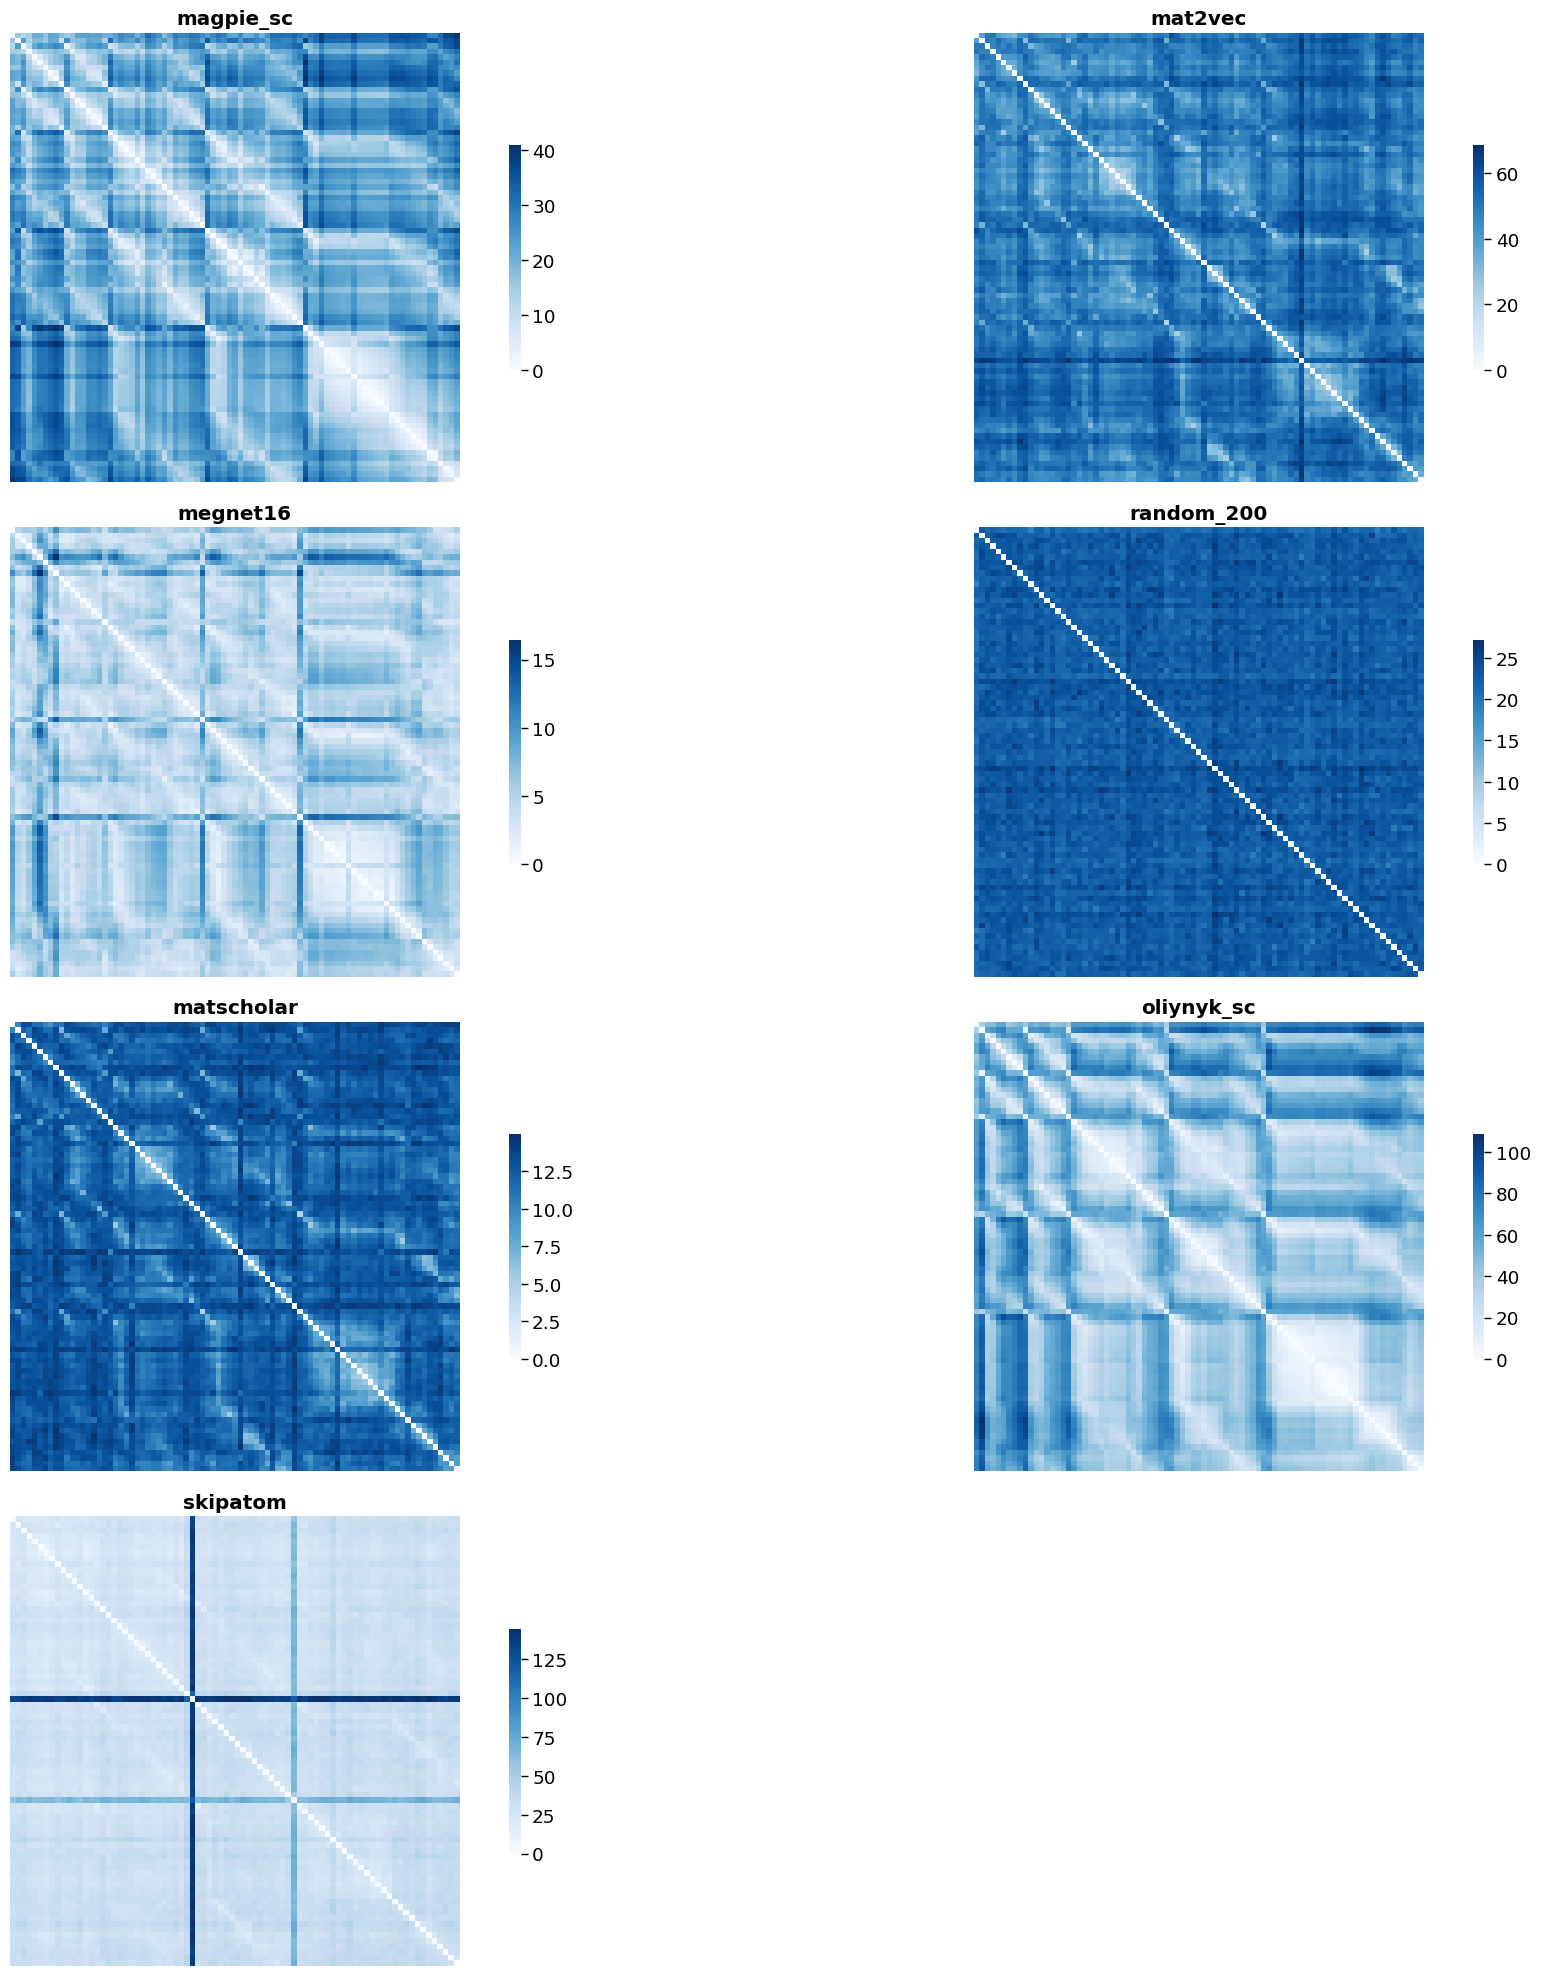

In [7]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="manhattan",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_manhattan.pdf", bbox_inches="tight")
fig.show()

### Chebyshev

/tmp/ipykernel_29037/3863533739.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


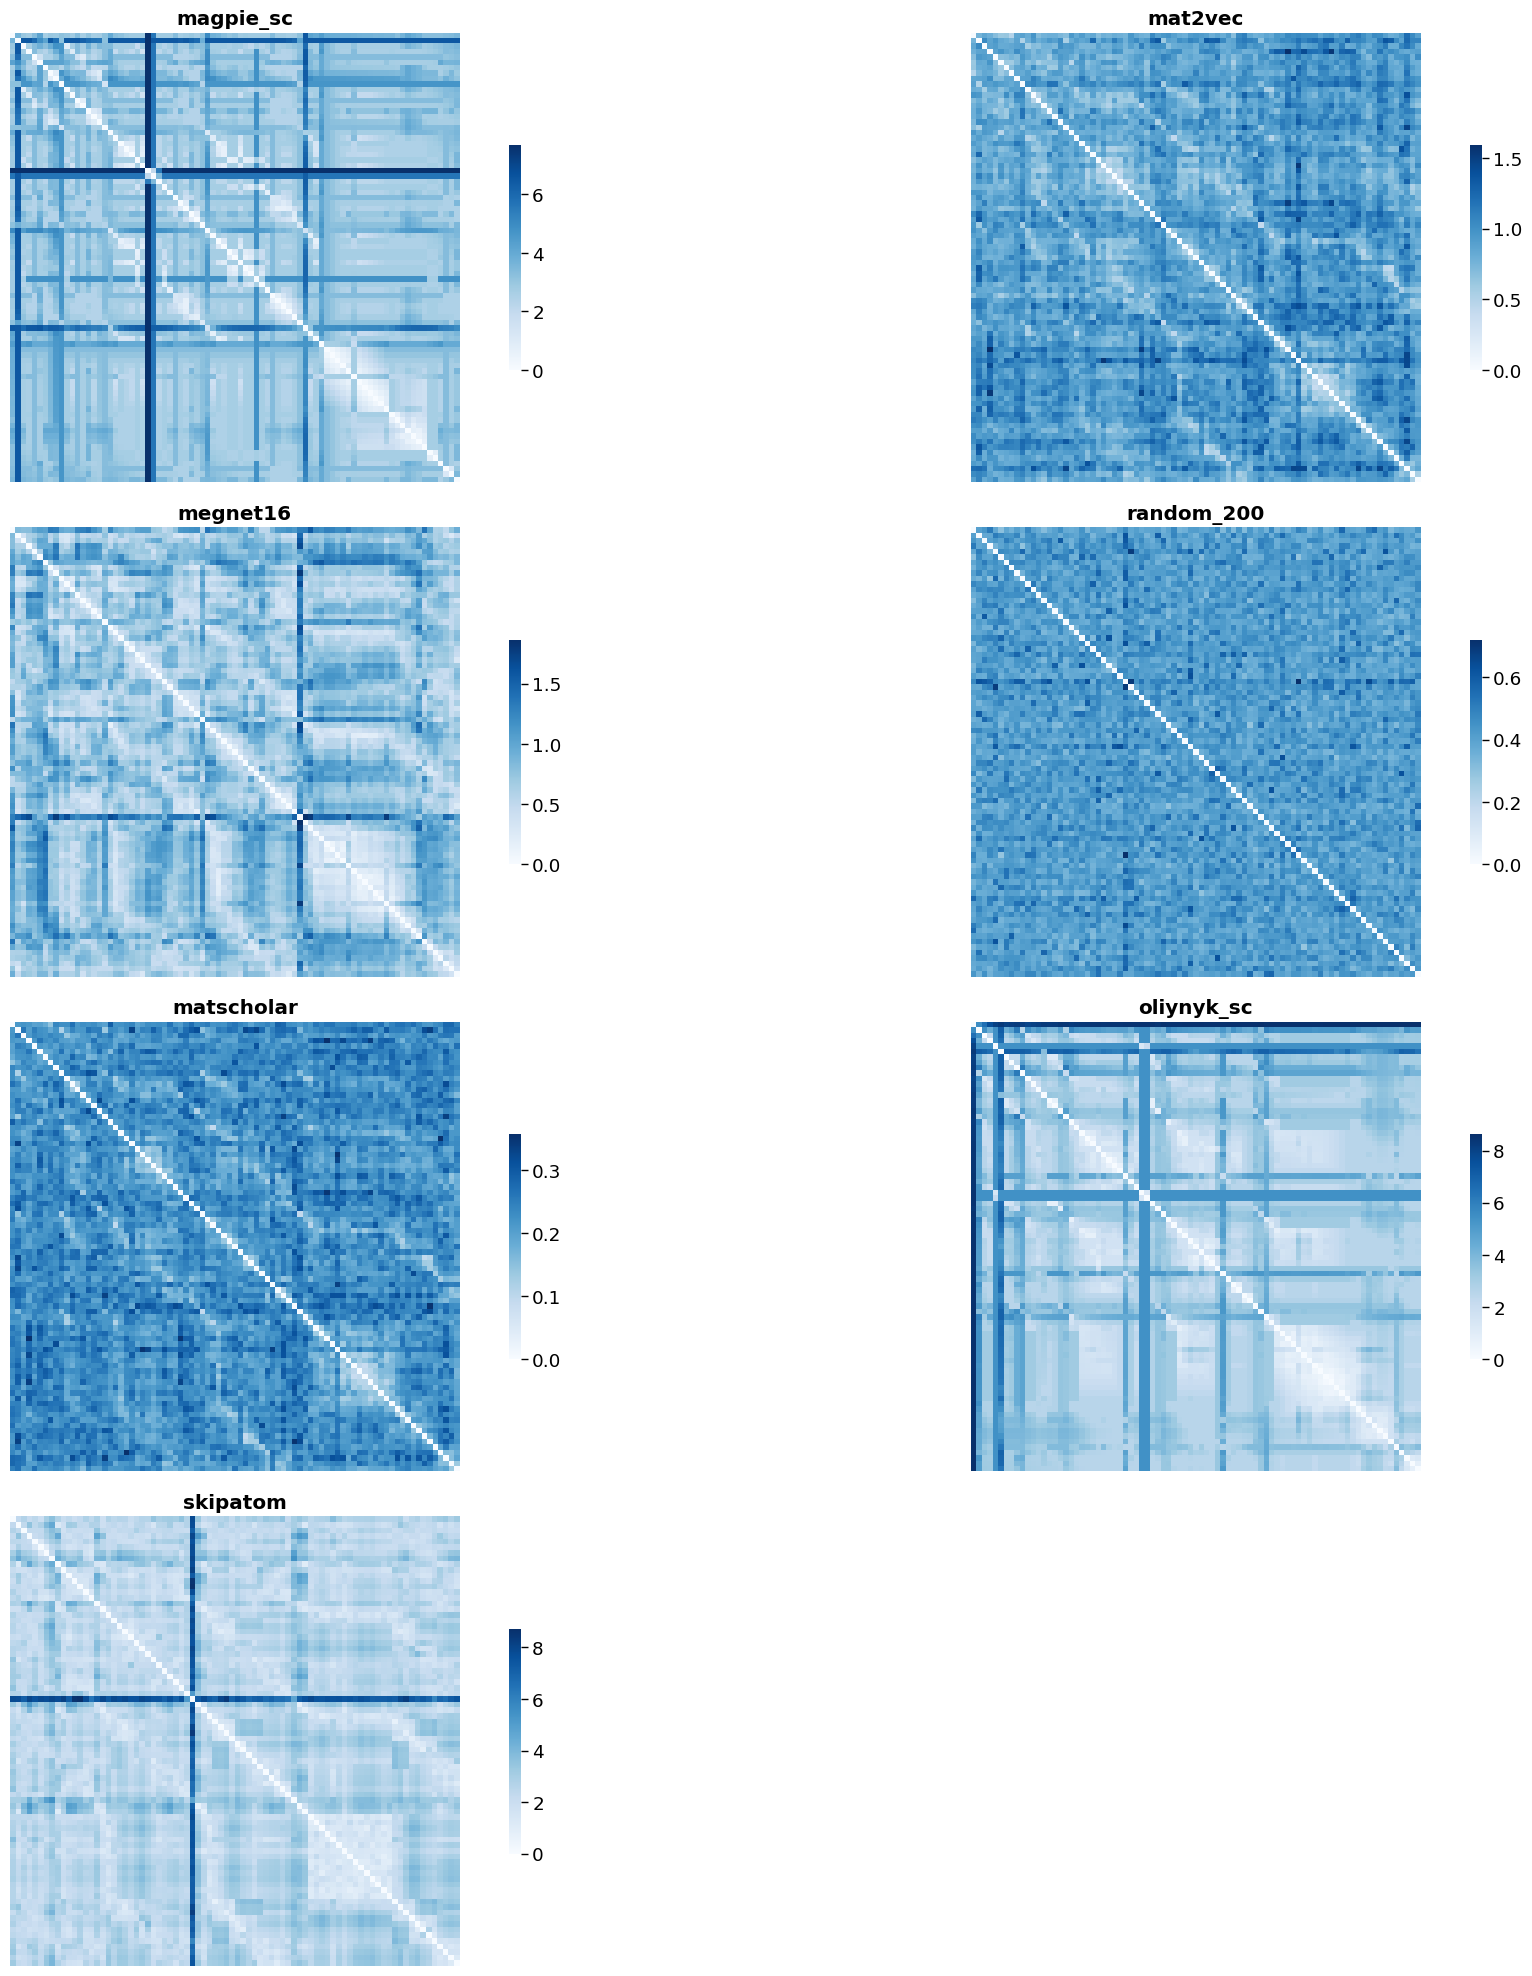

In [8]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="chebyshev",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_chebyshev.pdf", bbox_inches="tight")
fig.show()

### Wasserstein distance

/tmp/ipykernel_29037/3420910207.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


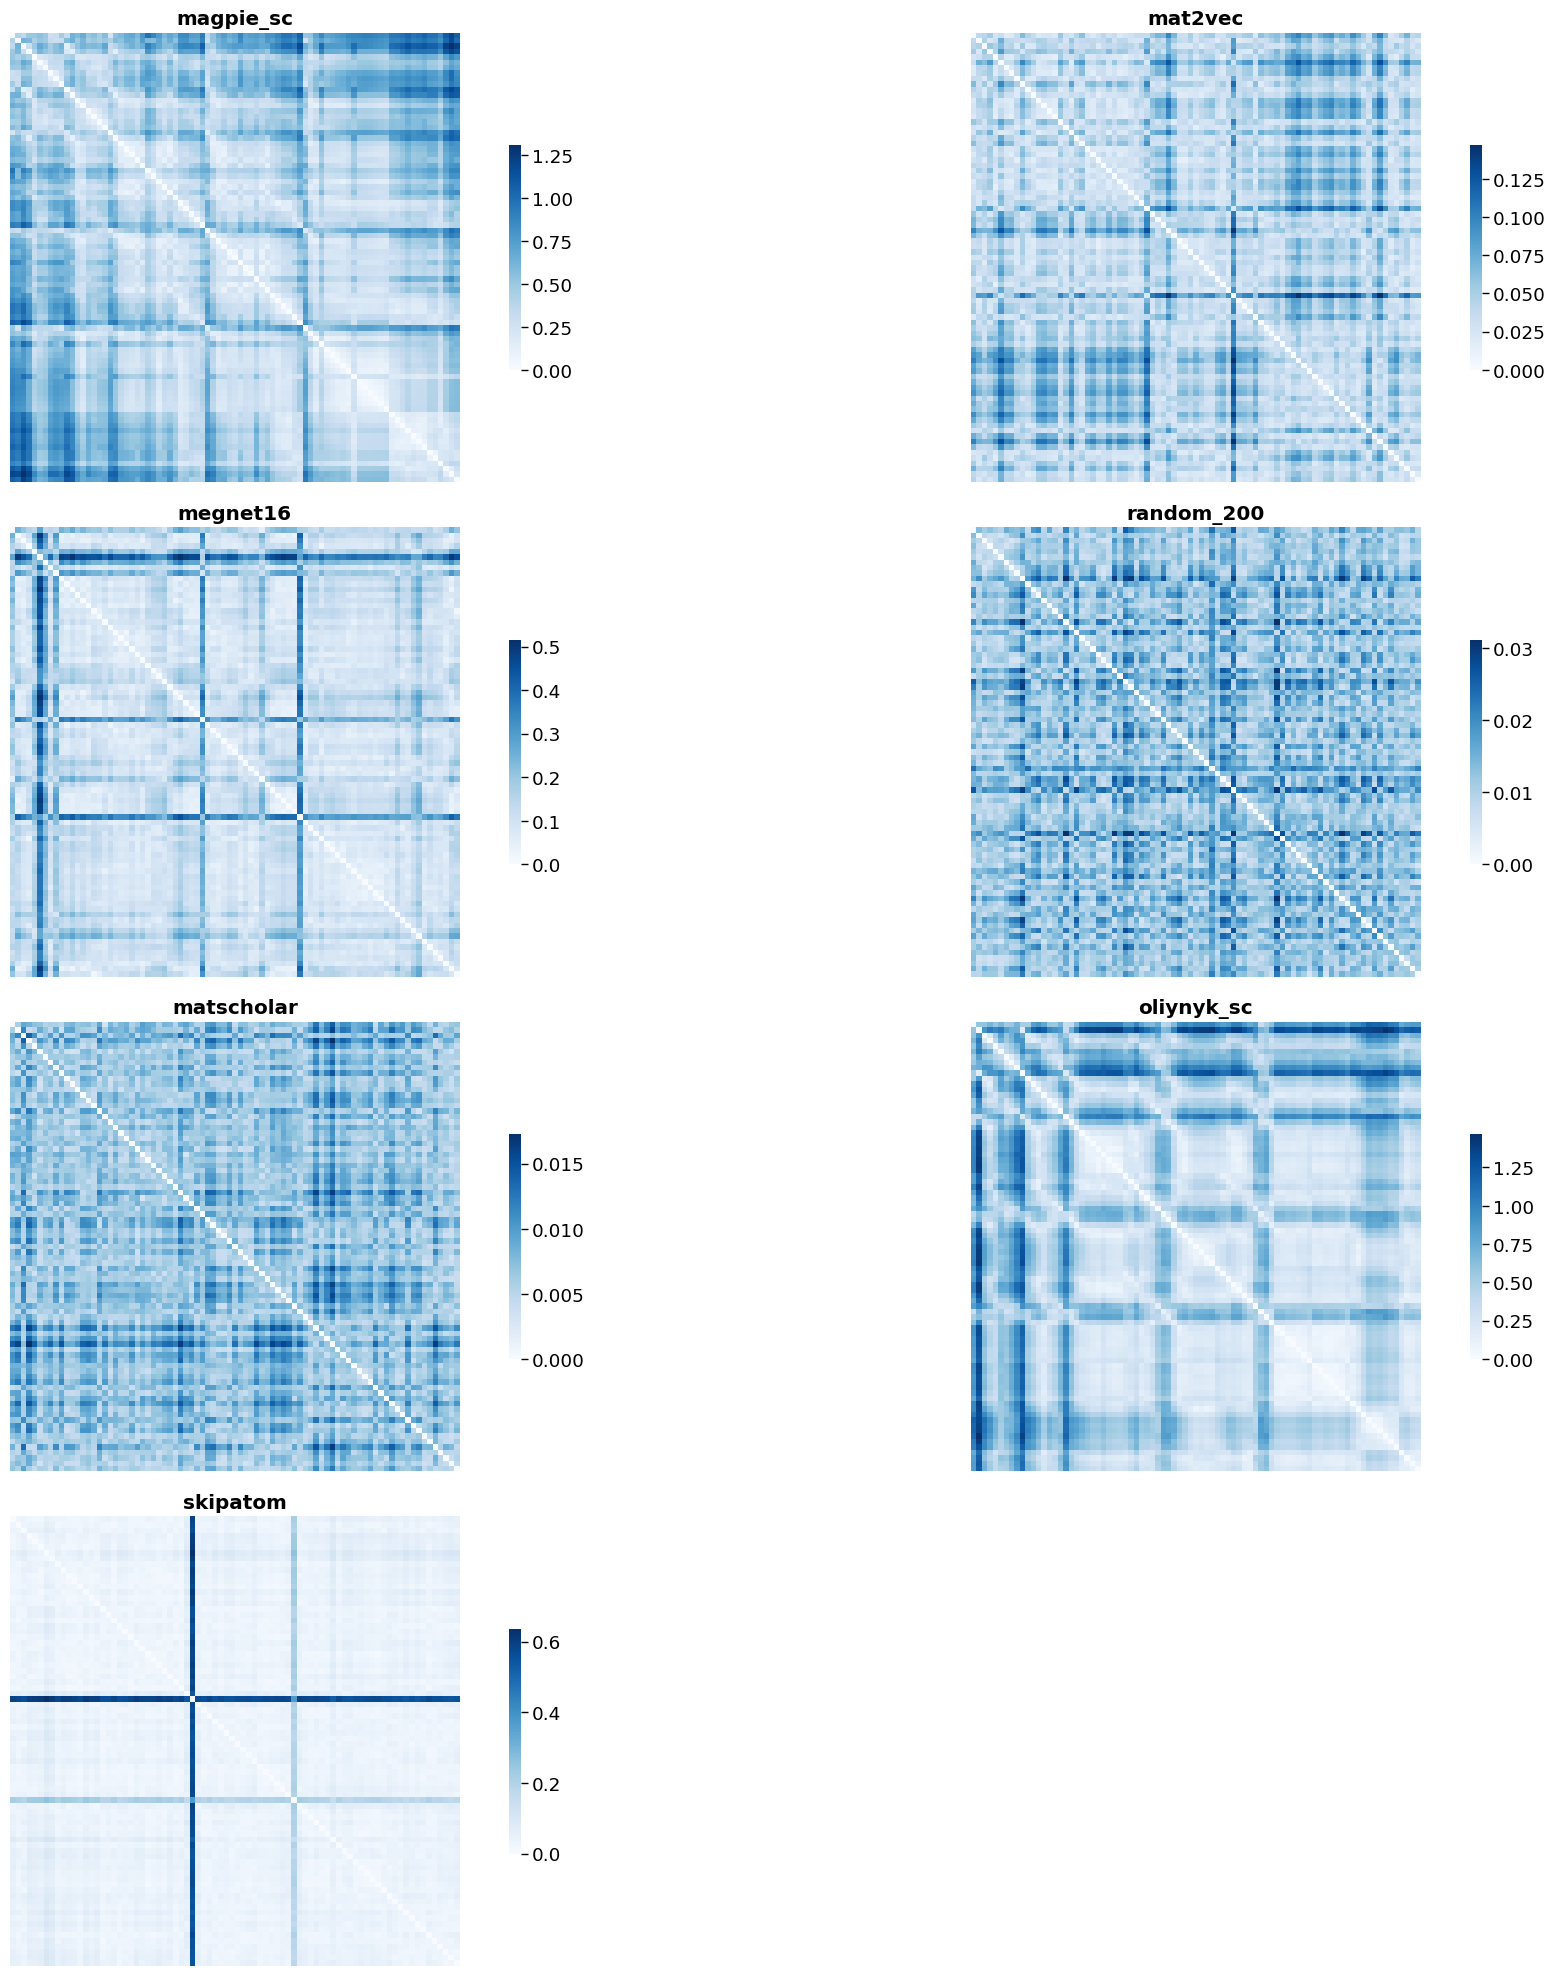

In [9]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="wasserstein",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_wasserstein.pdf", bbox_inches="tight")
fig.show()

### Cosine distance

/tmp/ipykernel_29037/2420043346.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


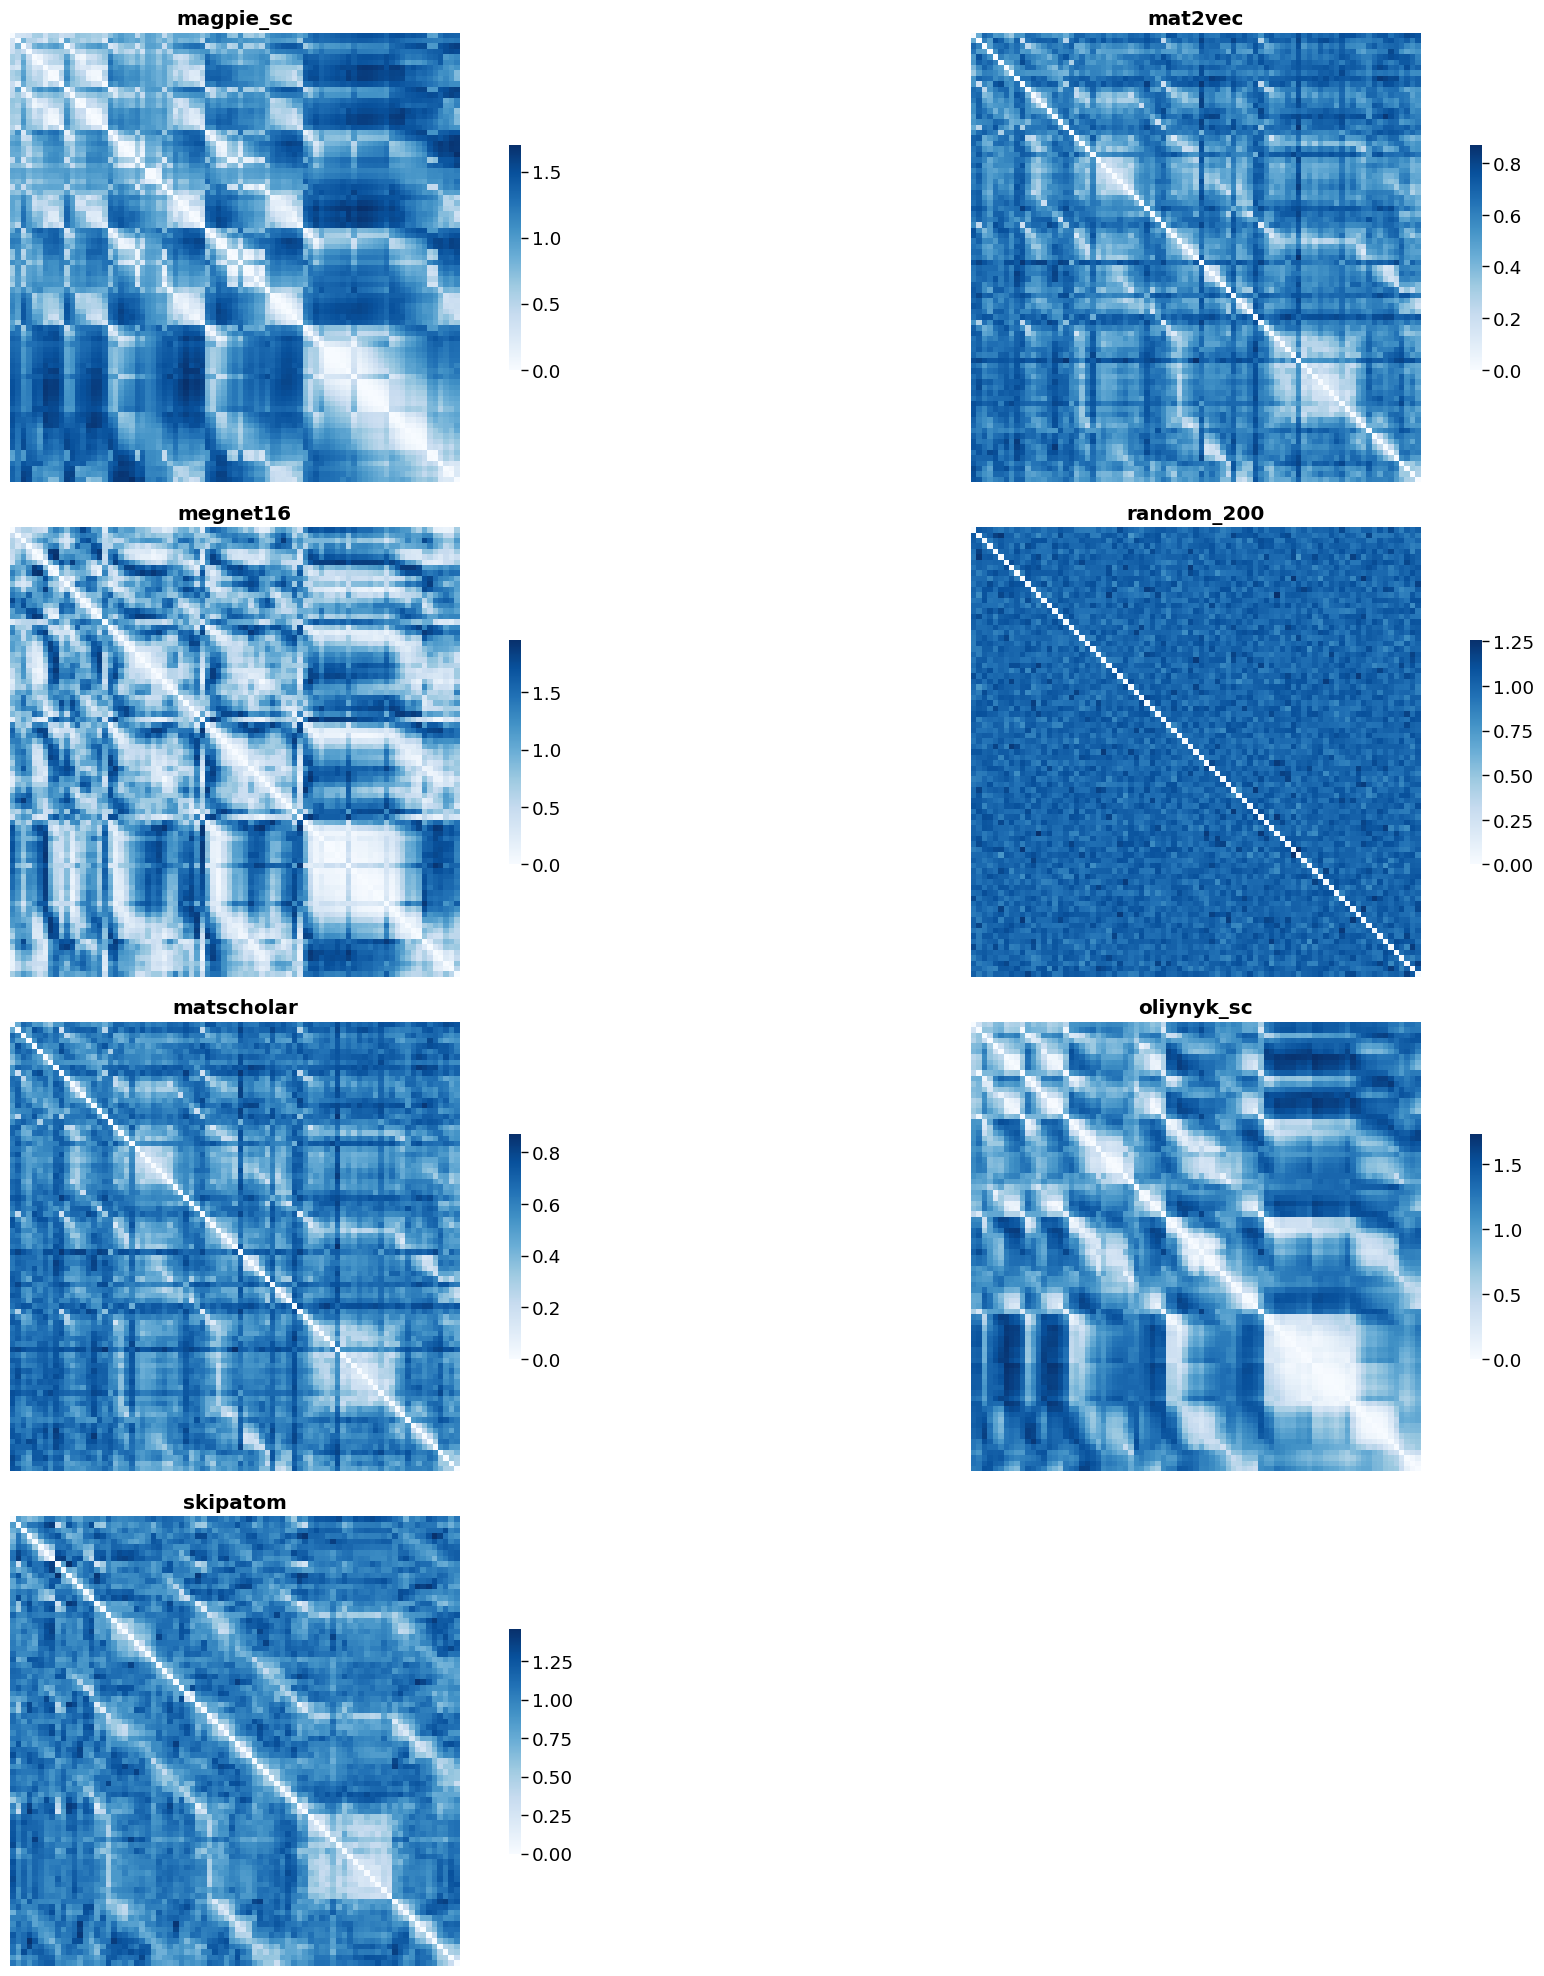

In [10]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="cosine_distance",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_cosdistance.pdf", bbox_inches="tight")
fig.show()

### Pearson correlation

/tmp/ipykernel_29037/4143305109.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


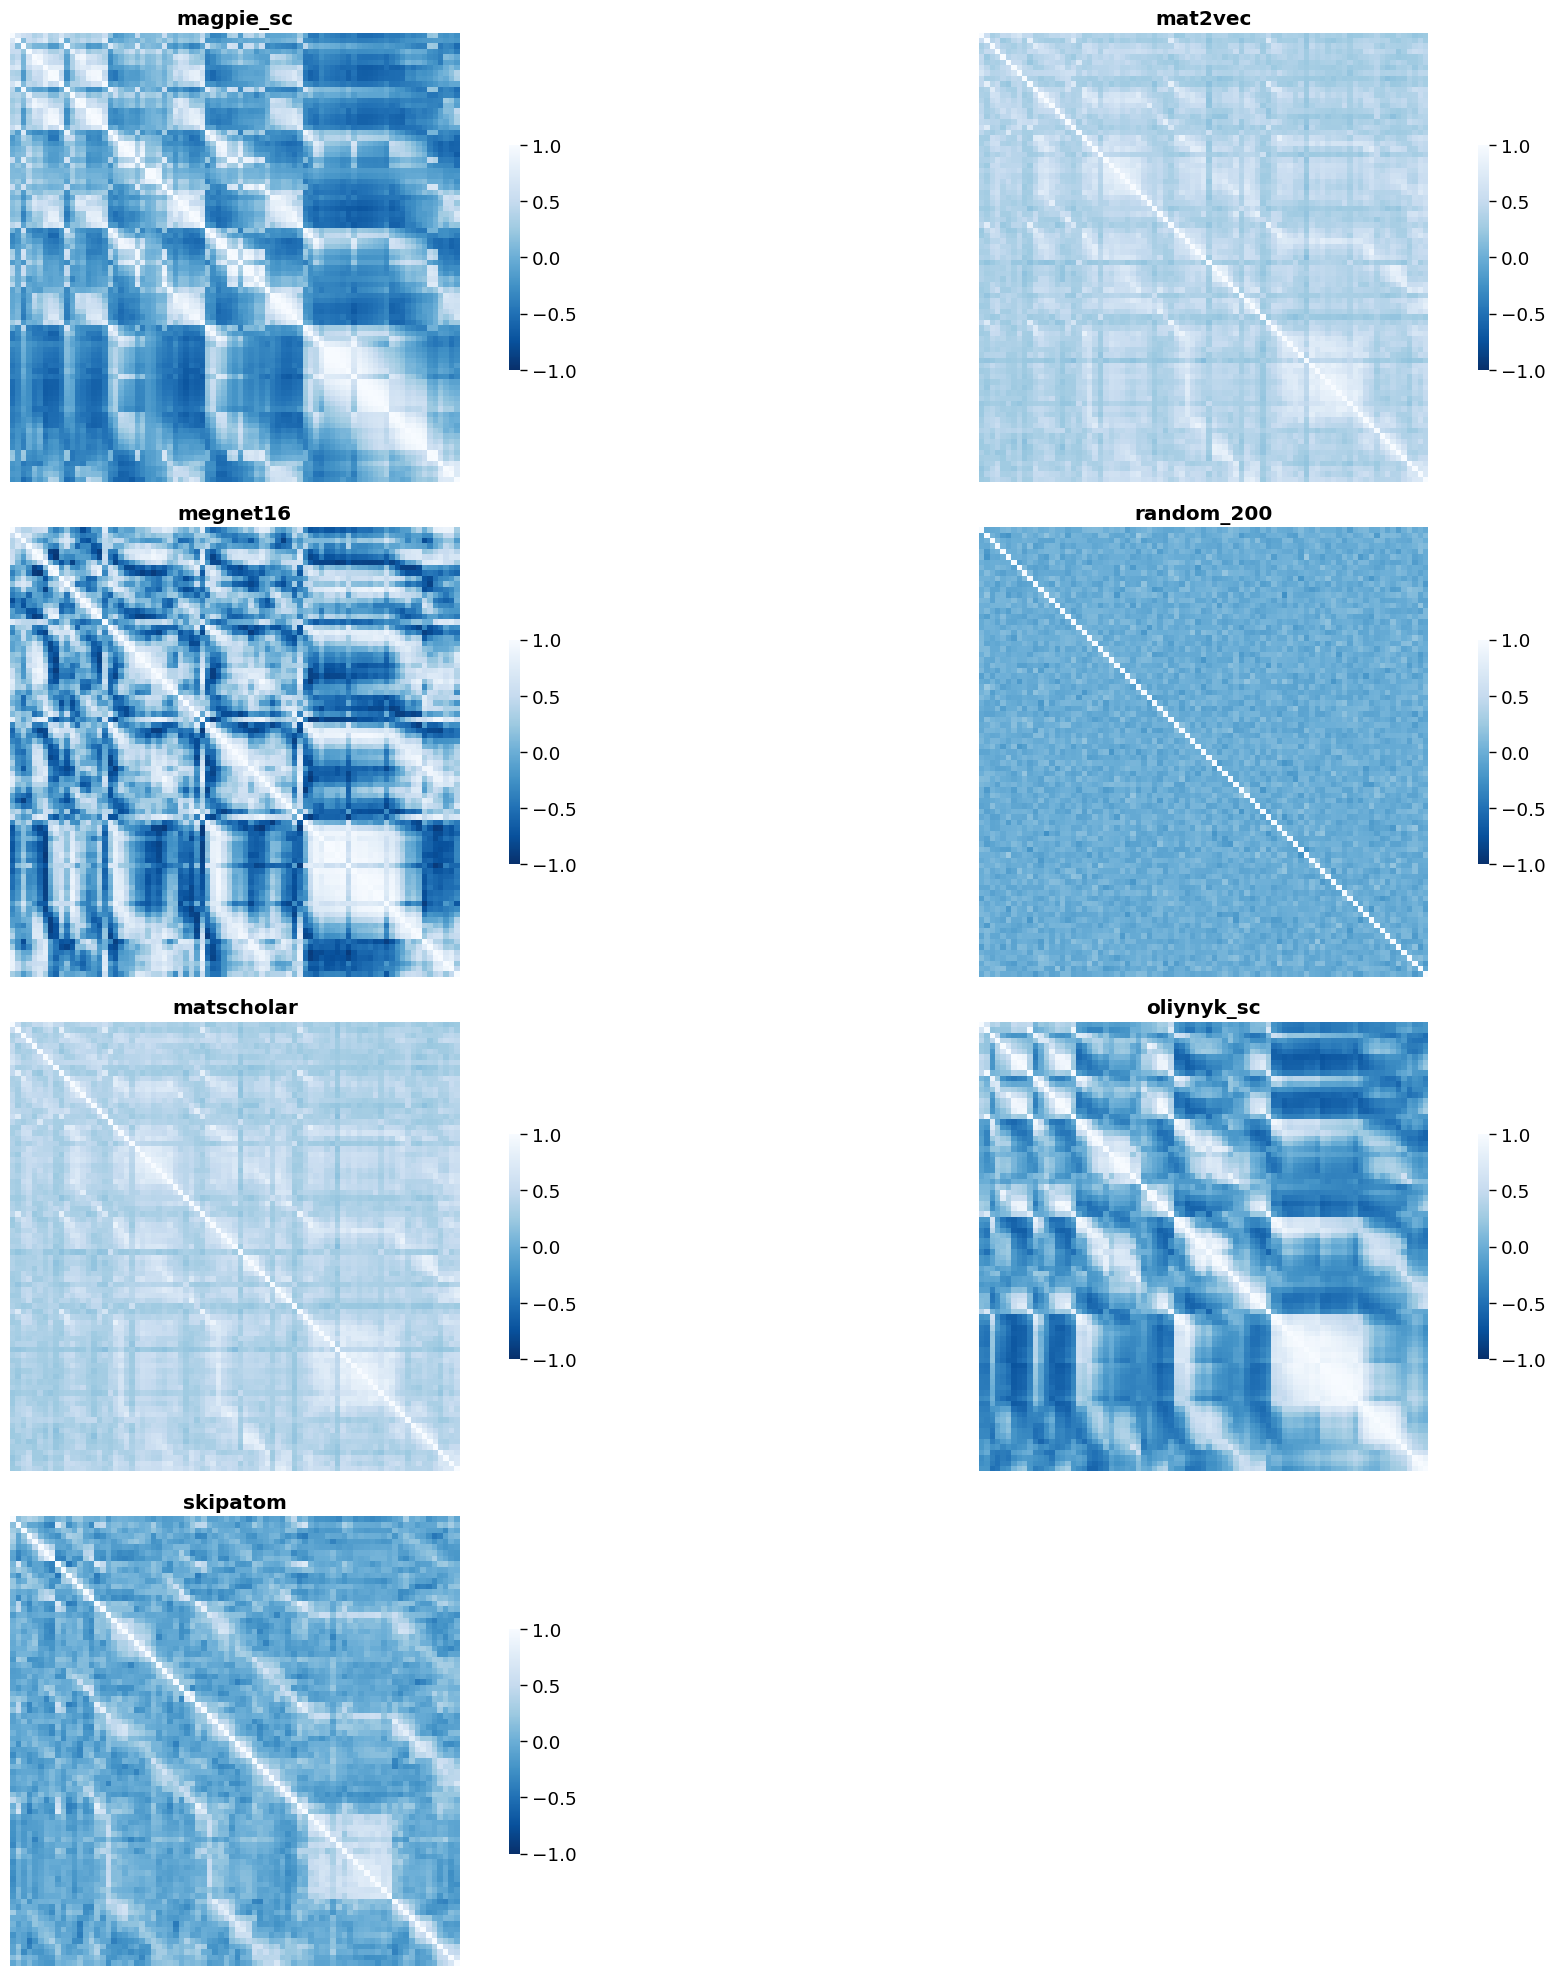

In [11]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))
heatmap_params = {"vmin":-1, "vmax":1}
for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="pearson",
        cmap="Blues_r",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
        **heatmap_params
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_pearson.pdf", bbox_inches="tight")
fig.show()

### Spearman correlation

/tmp/ipykernel_29037/3436373652.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


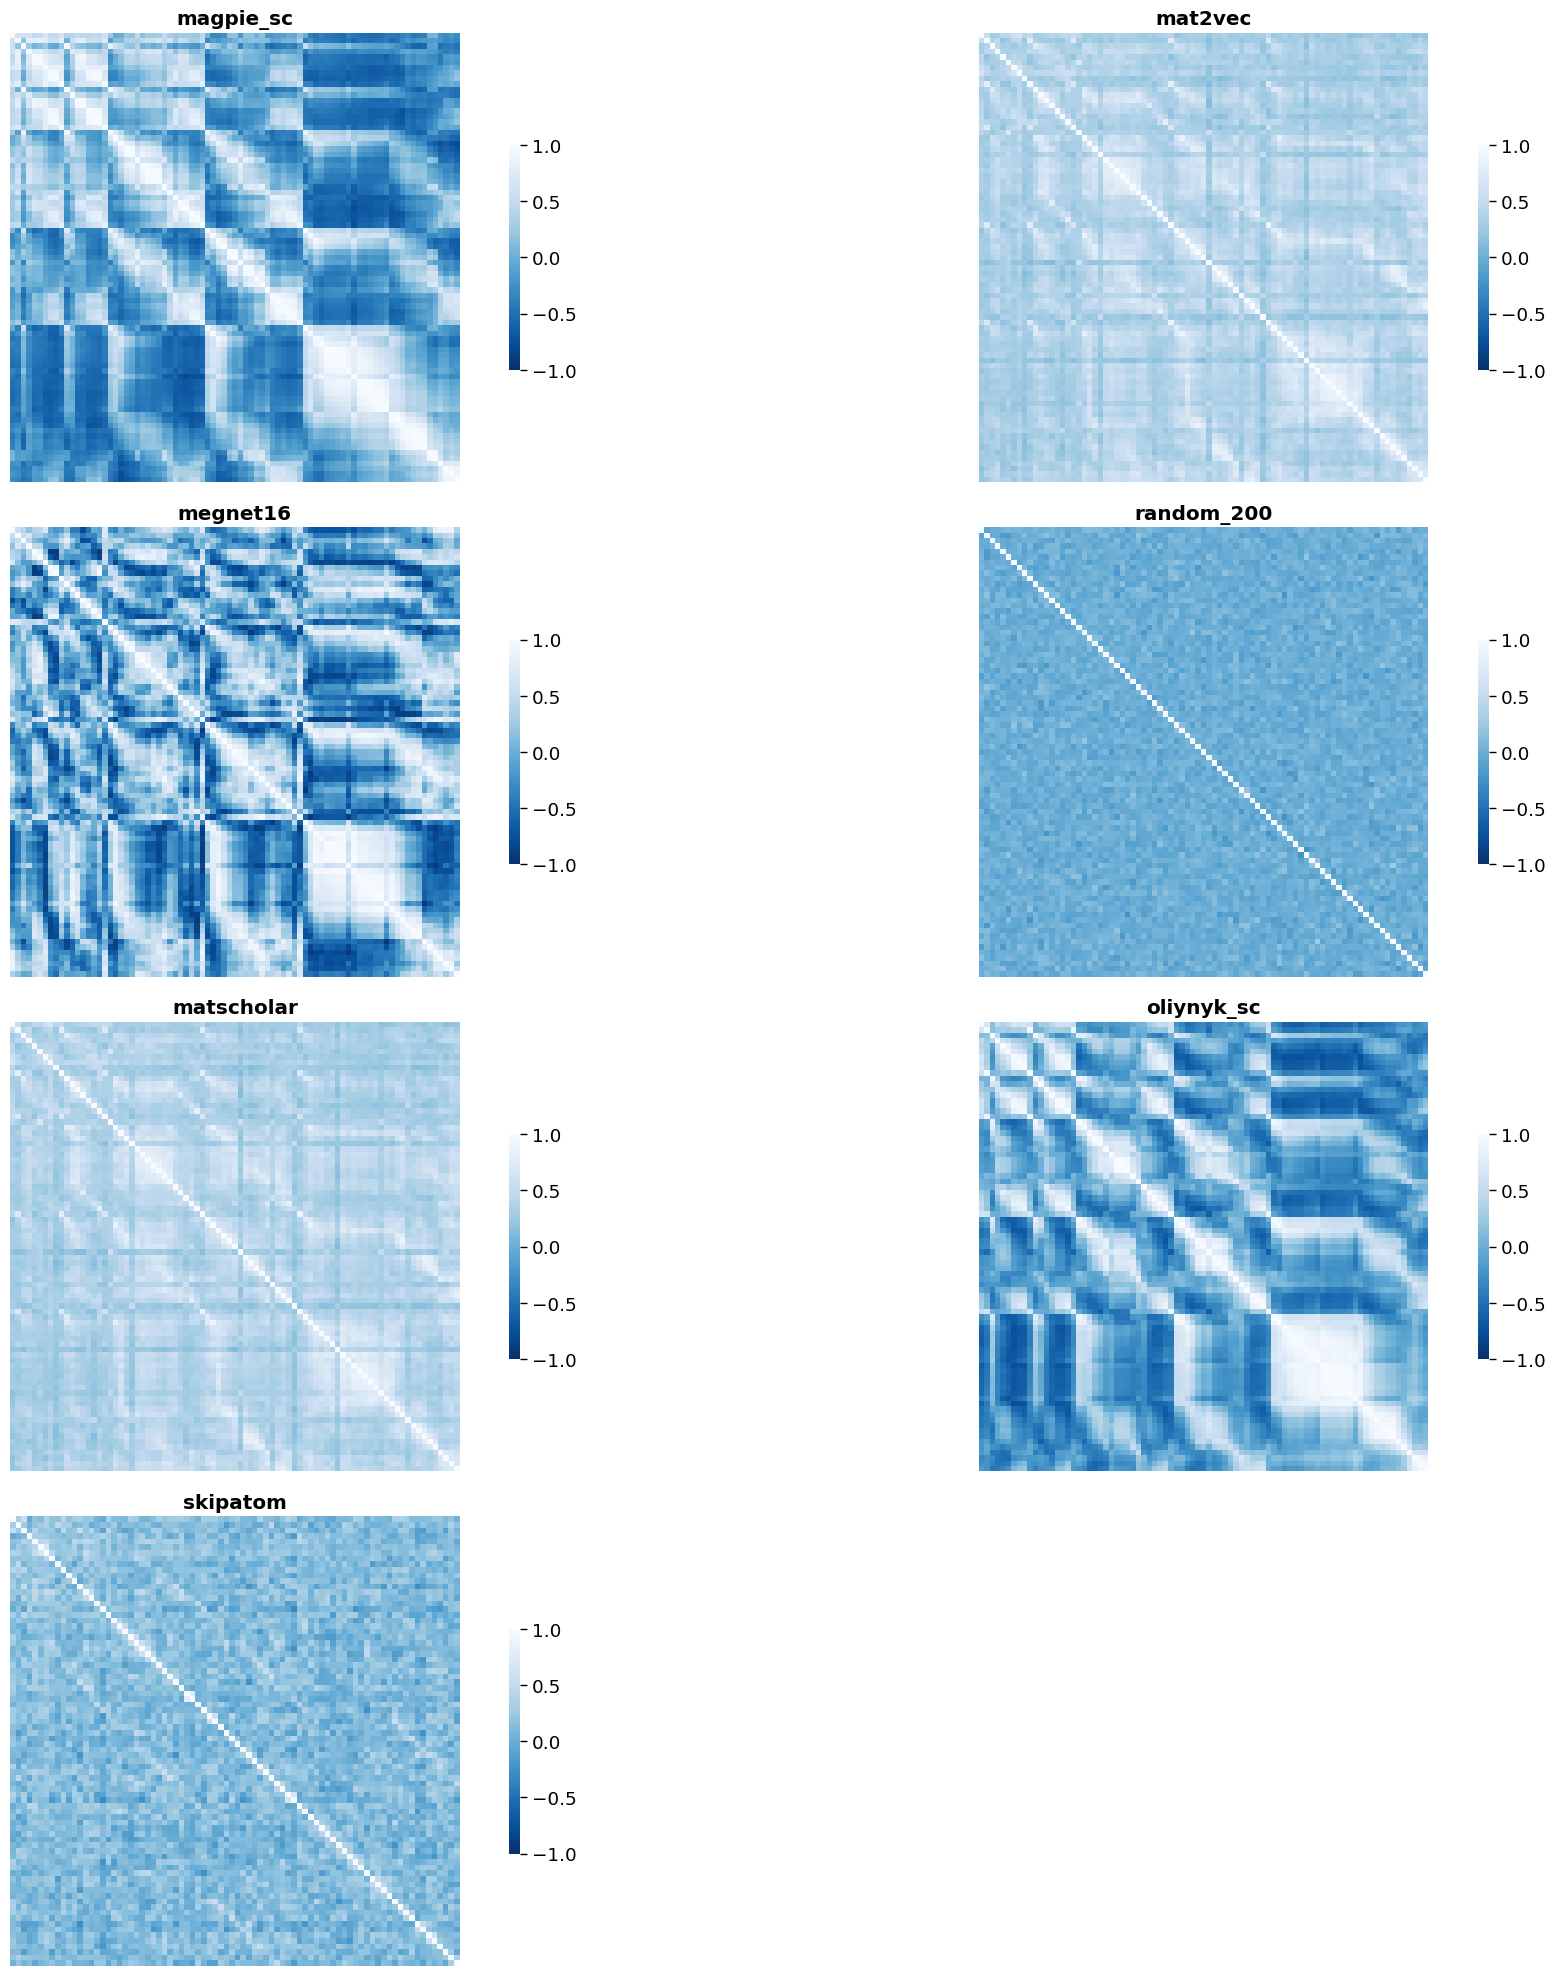

In [12]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))
heatmap_params = {"vmin":-1, "vmax":1}
for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="spearman",
        cmap="Blues_r",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
        **heatmap_params
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_spearman.pdf", bbox_inches="tight")
fig.show()

### Cosine similarity

/tmp/ipykernel_29037/900078615.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


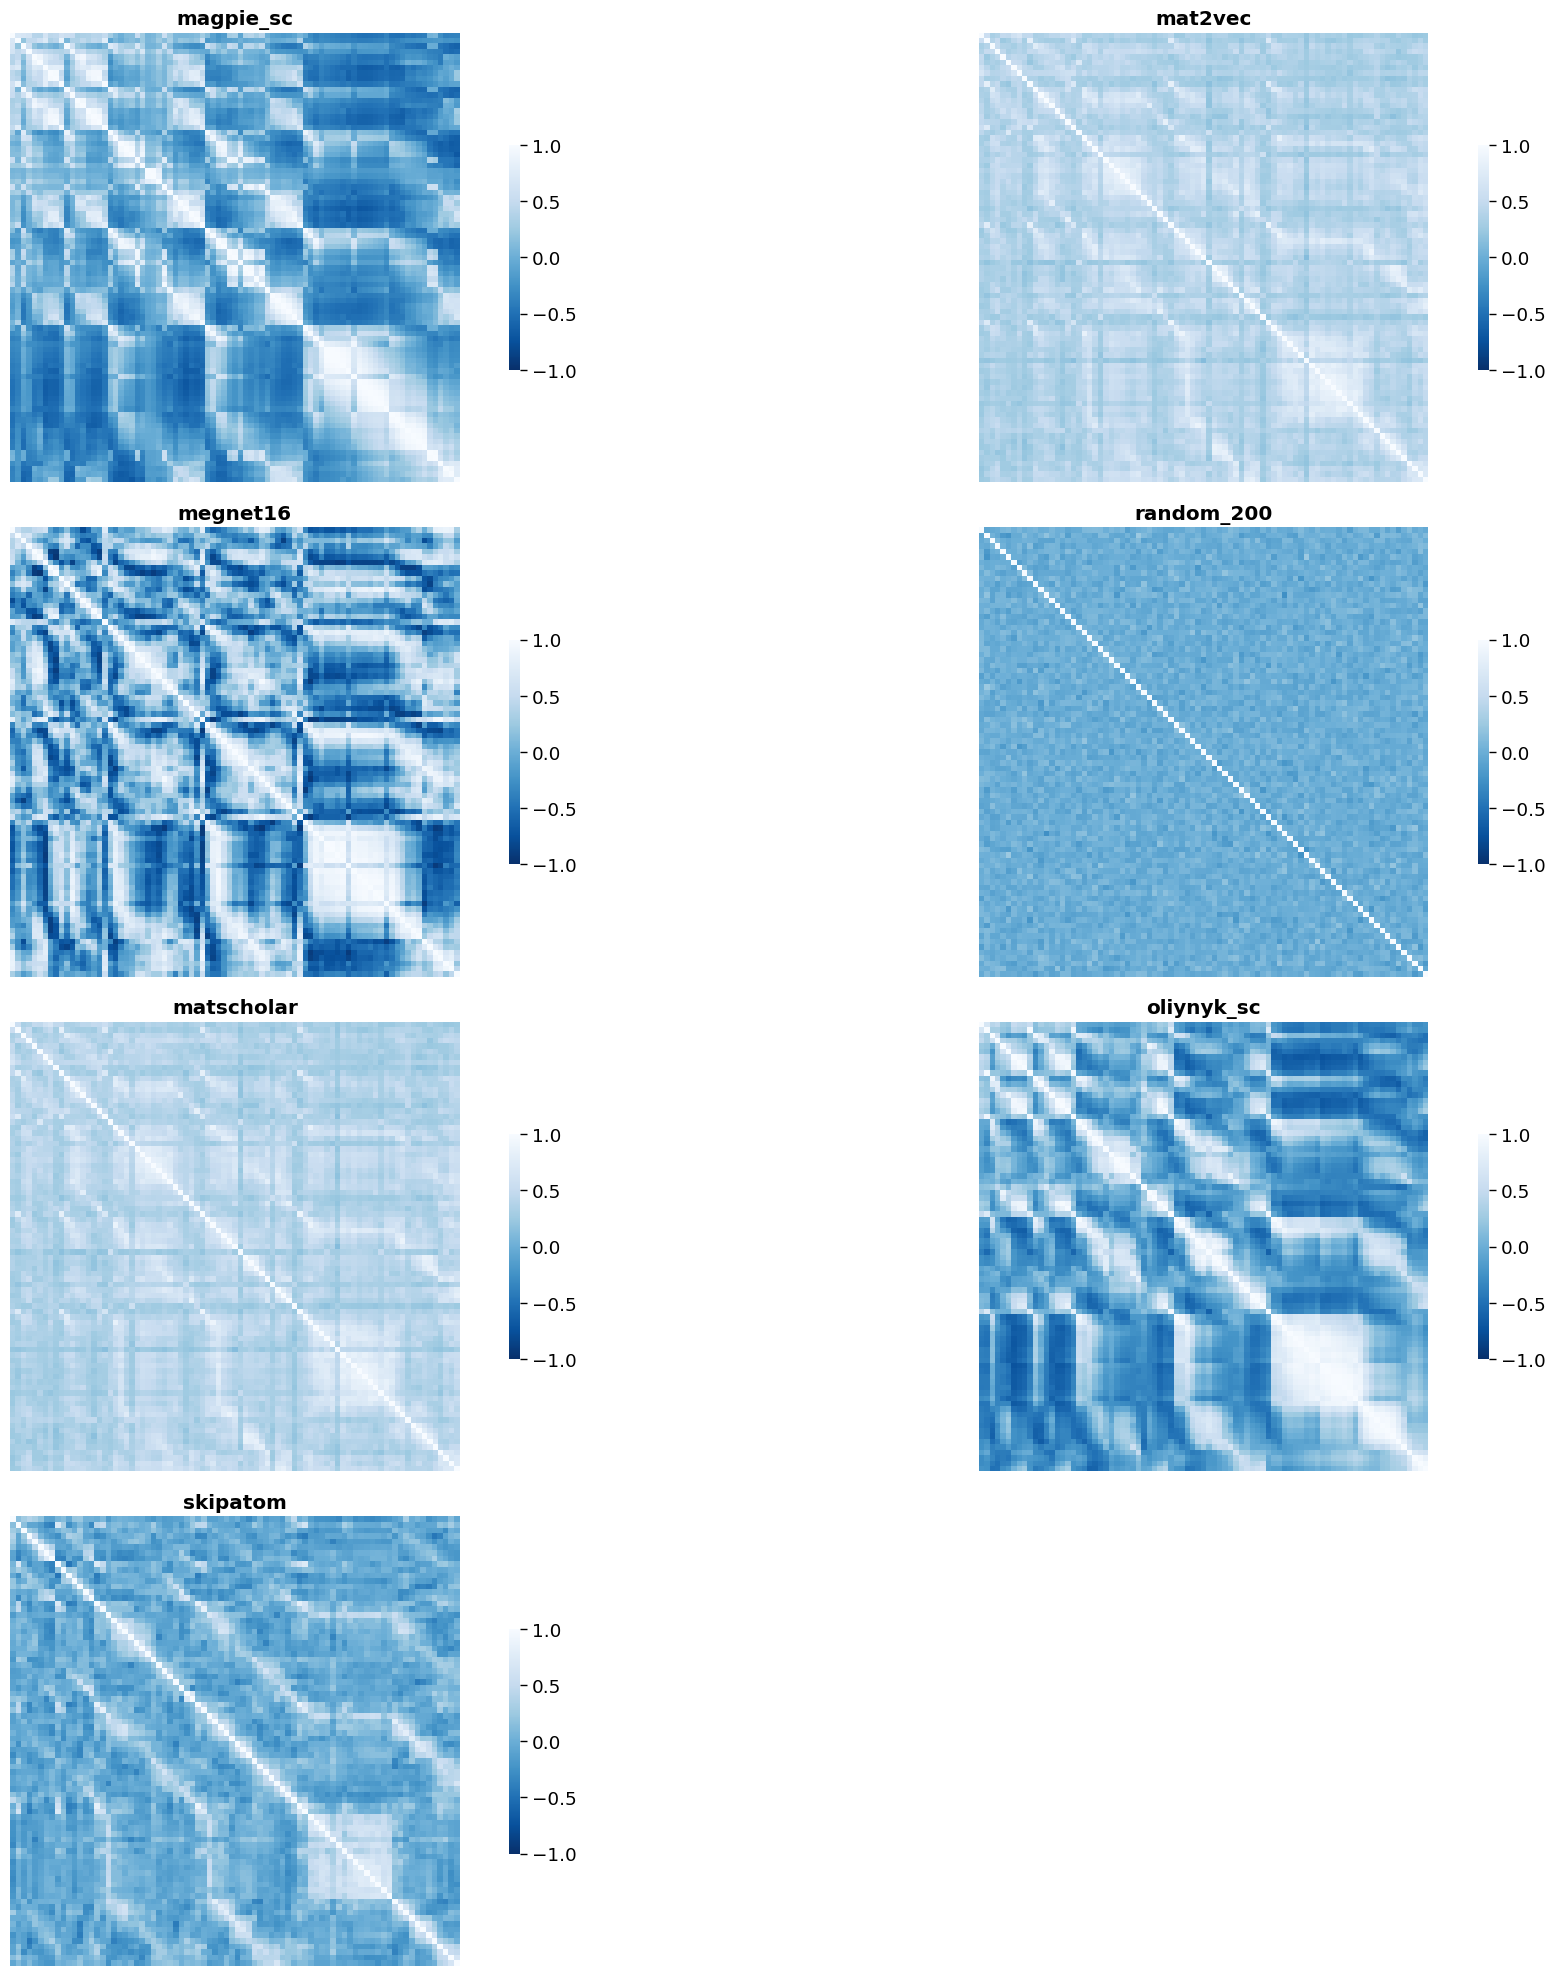

In [13]:
fig, (axes) = plt.subplots(4, 2, figsize=(20, 20))
heatmap_params = {"vmin":-1, "vmax":1}
for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    heatmap_plotter(
        embedding=cbfv,
        metric="cosine_similarity",
        cmap="Blues_r",
        sortaxisby="atomic_number",
        show_axislabels=False,
        ax=ax,
        **heatmap_params
    )
    #plt.subplots_adjust(wspace=0.001)
axes[-1][-1].remove()


fig.tight_layout()
fig.savefig("SI_cosinesimilarity.pdf", bbox_inches="tight")
fig.show()

## Two-dimensional projections

### Principal Component Analysis (PCA)

/tmp/ipykernel_29037/2930108455.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


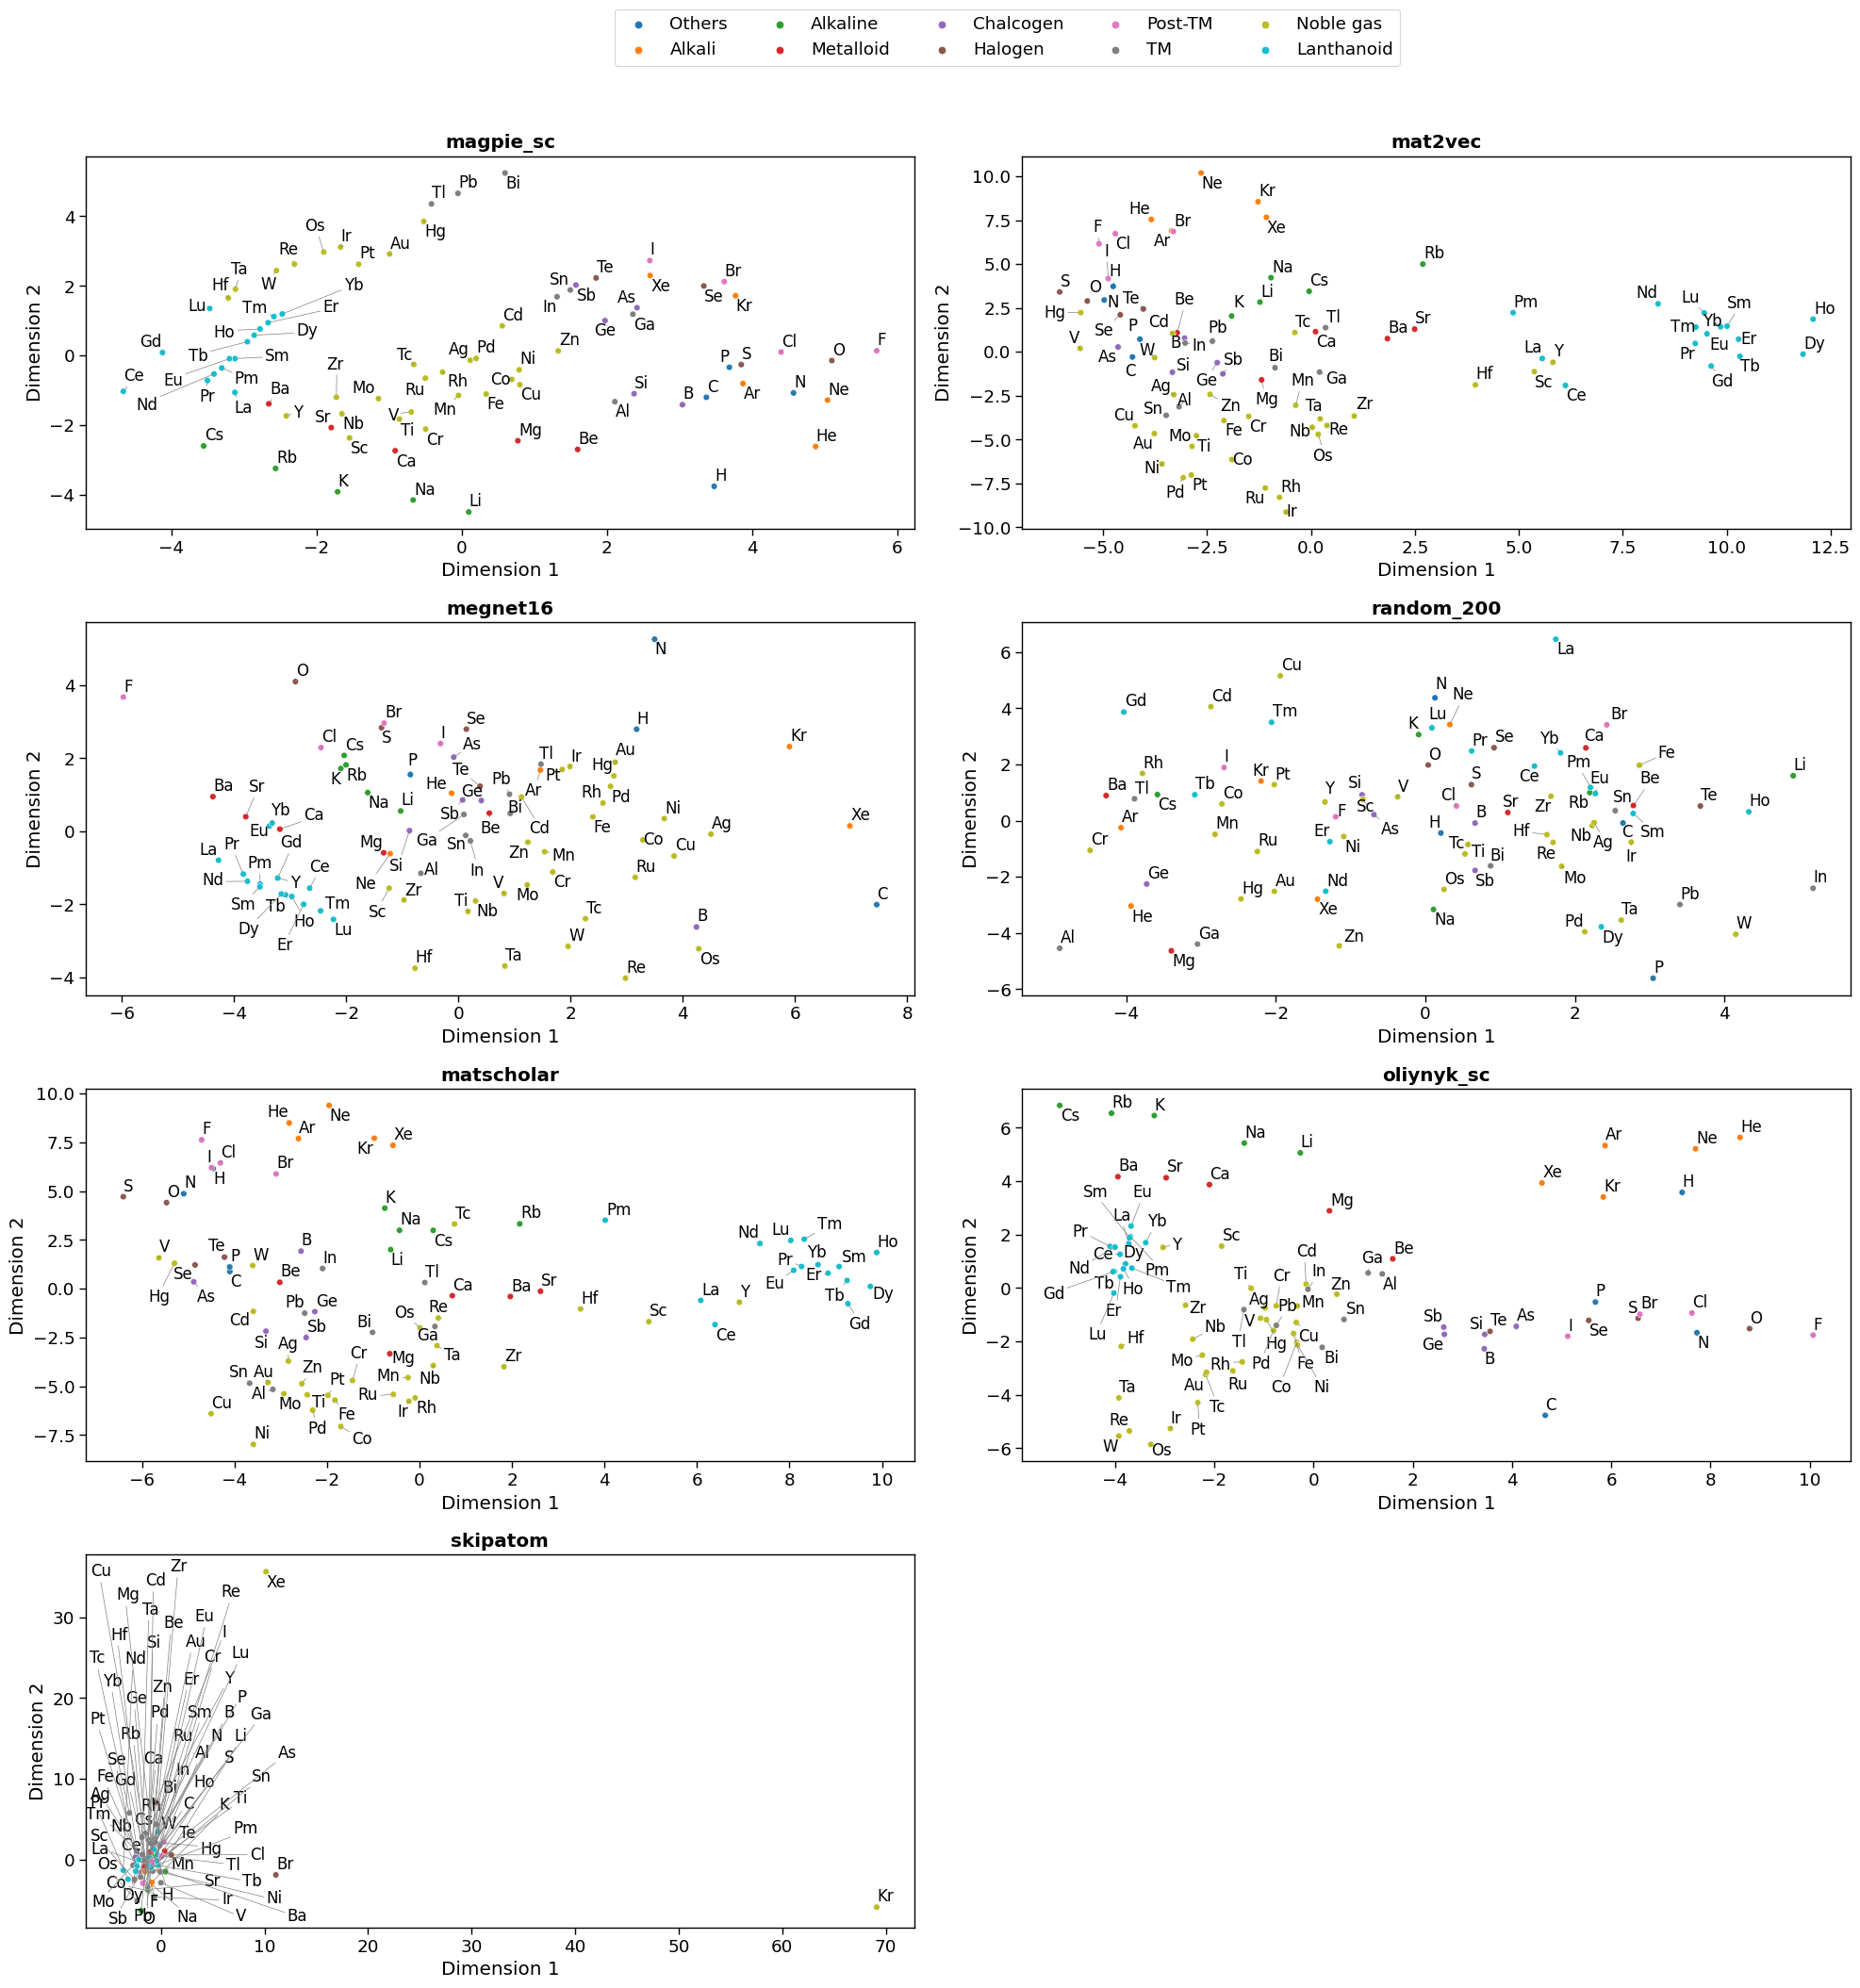

In [14]:
fig, axes = plt.subplots(
    4,
    2,
    figsize=(20, 20),
)

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    dimension_plotter(
        embedding=cbfv,
        reducer="pca",
        n_components=2,
        ax=ax,
        adjusttext=True,
    )
    ax.legend().remove()
axes[-1][-1].remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.54, 1.06), loc="upper center", ncol=5)
fig.tight_layout()
plt.savefig("SI_pca.pdf", bbox_inches="tight")
fig.show()

### t-distributed Stochastic Neighbor Embedding (t-SNE)

/tmp/ipykernel_29037/3923900631.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


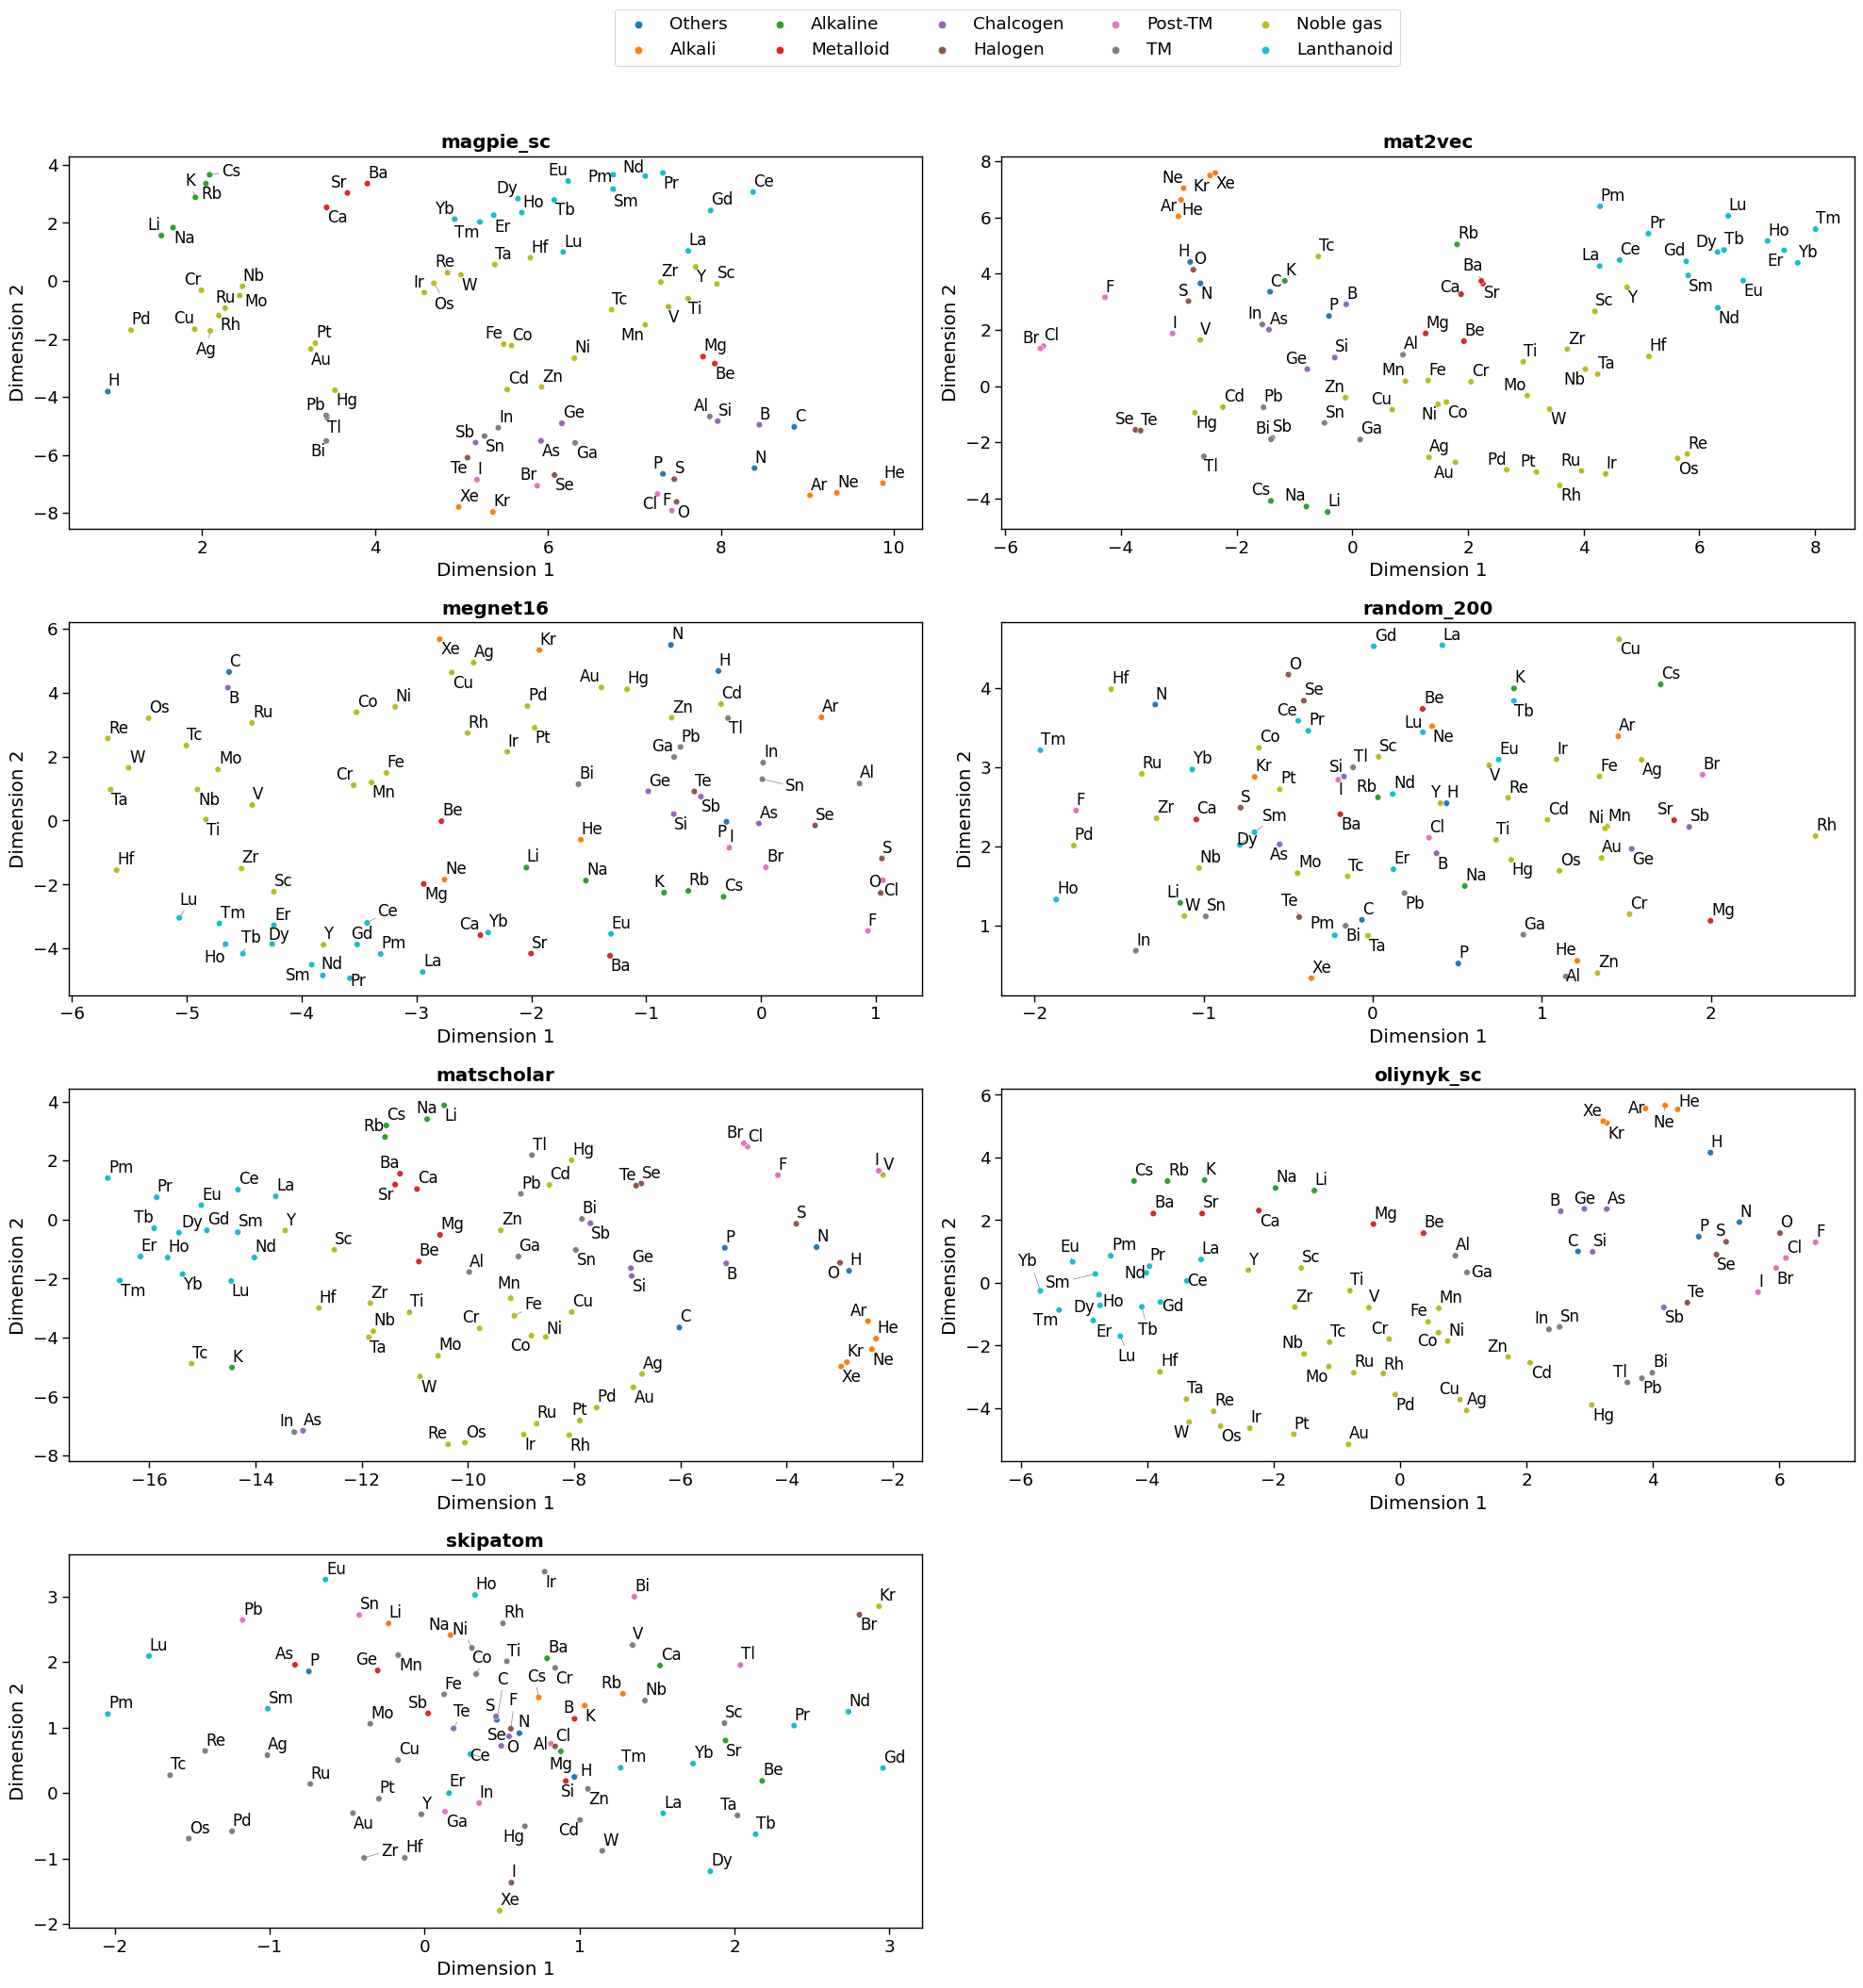

In [15]:
fig, axes = plt.subplots(
    4,
    2,
    figsize=(20, 20),
)

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    dimension_plotter(
        embedding=cbfv,
        reducer="tsne",
        n_components=2,
        ax=ax,
        #adjusttext=True,
    )
    ax.legend().remove()
axes[-1][-1].remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.54, 1.06), loc="upper center", ncol=5)
fig.tight_layout()
plt.savefig("SI_tsne.pdf", bbox_inches="tight")
fig.show()

### Uniform Manifold Approximation and Projection (UMAP)

/tmp/ipykernel_29037/1044218644.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


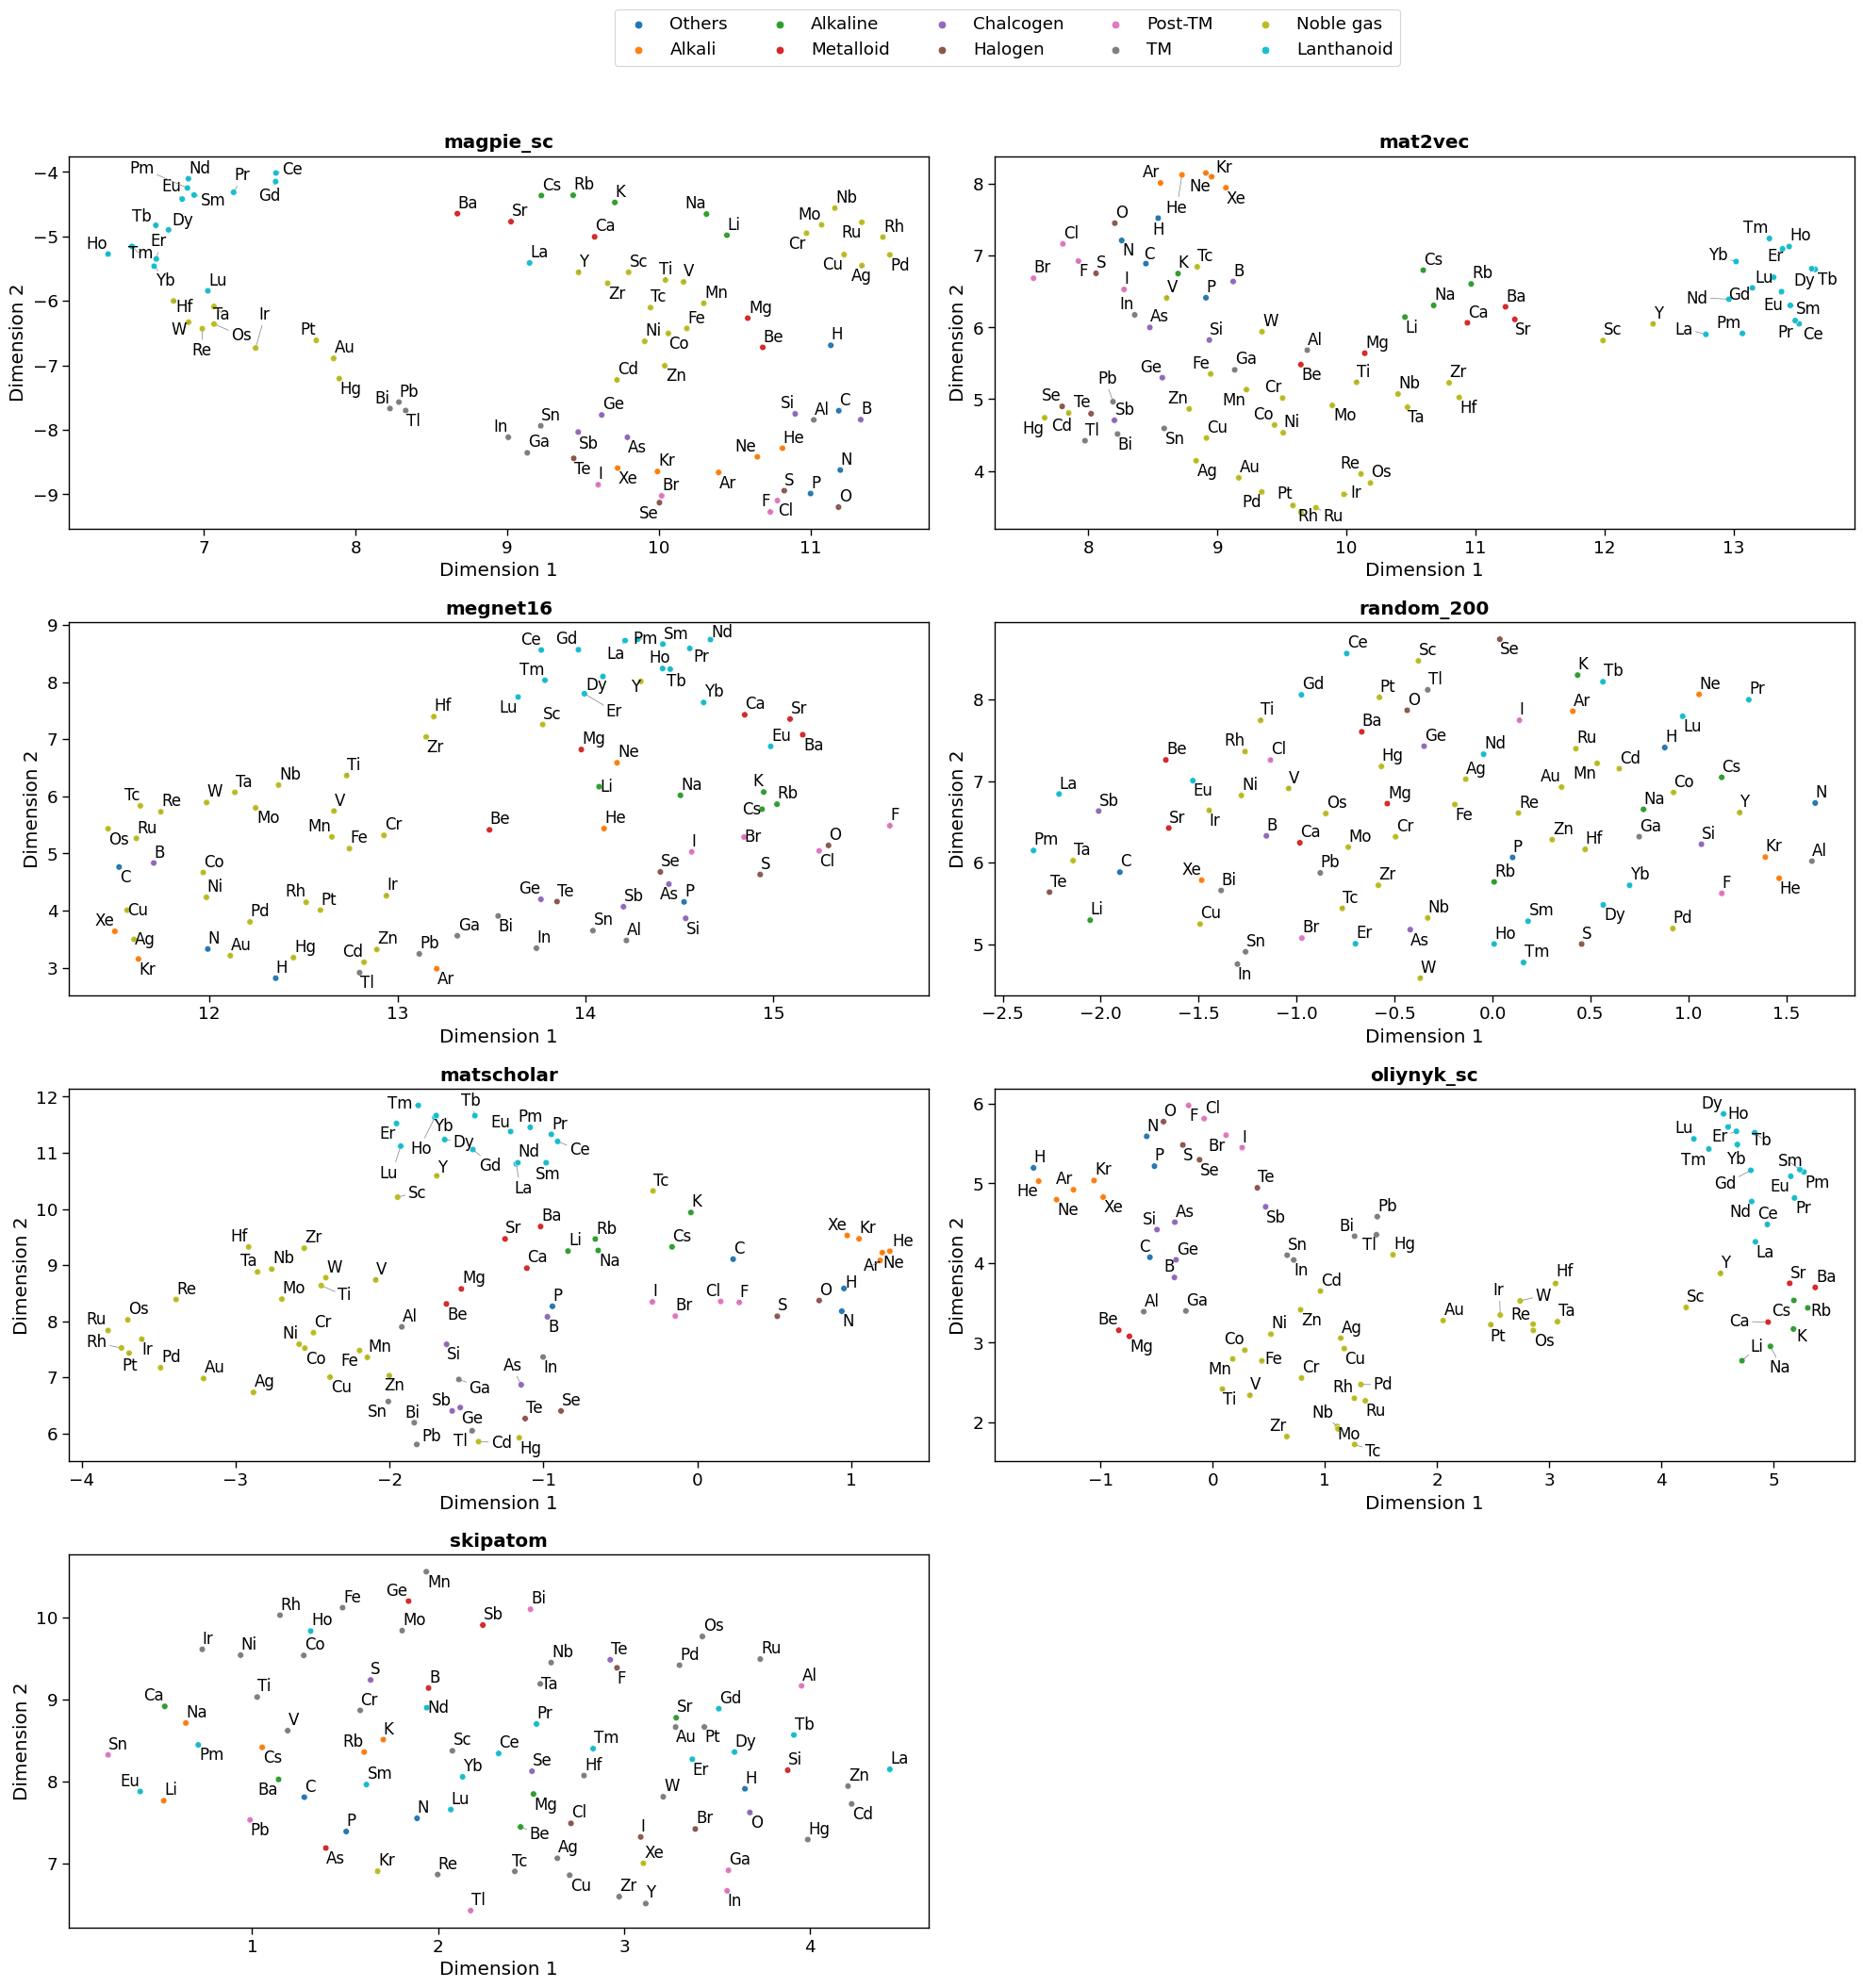

In [16]:
fig, axes = plt.subplots(
    4,
    2,
    figsize=(20, 20),
)

for ax, cbfv in zip(axes.flatten(), element_embedddings.values()):
    dimension_plotter(
        embedding=cbfv,
        reducer="umap",
        n_components=2,
        ax=ax,
        adjusttext=True,
    )
    ax.legend().remove()
axes[-1][-1].remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.54, 1.06), loc="upper center", ncol=5)
fig.tight_layout()
plt.savefig("SI_umap.pdf", bbox_inches="tight")
fig.show()

## Distribution of similarity measures

### Pearson correlation

In [17]:
correlation_metrics = ["pearson", "cosine_similarity"]
correlation_dfs = {}
for rep in element_embedddings.keys():
    correlation_dfs[rep] = {"pearson":element_embedddings[rep].correlation_df(),
                            "cosine_similarity":element_embedddings[rep].correlation_df(metric="cosine_similarity")}

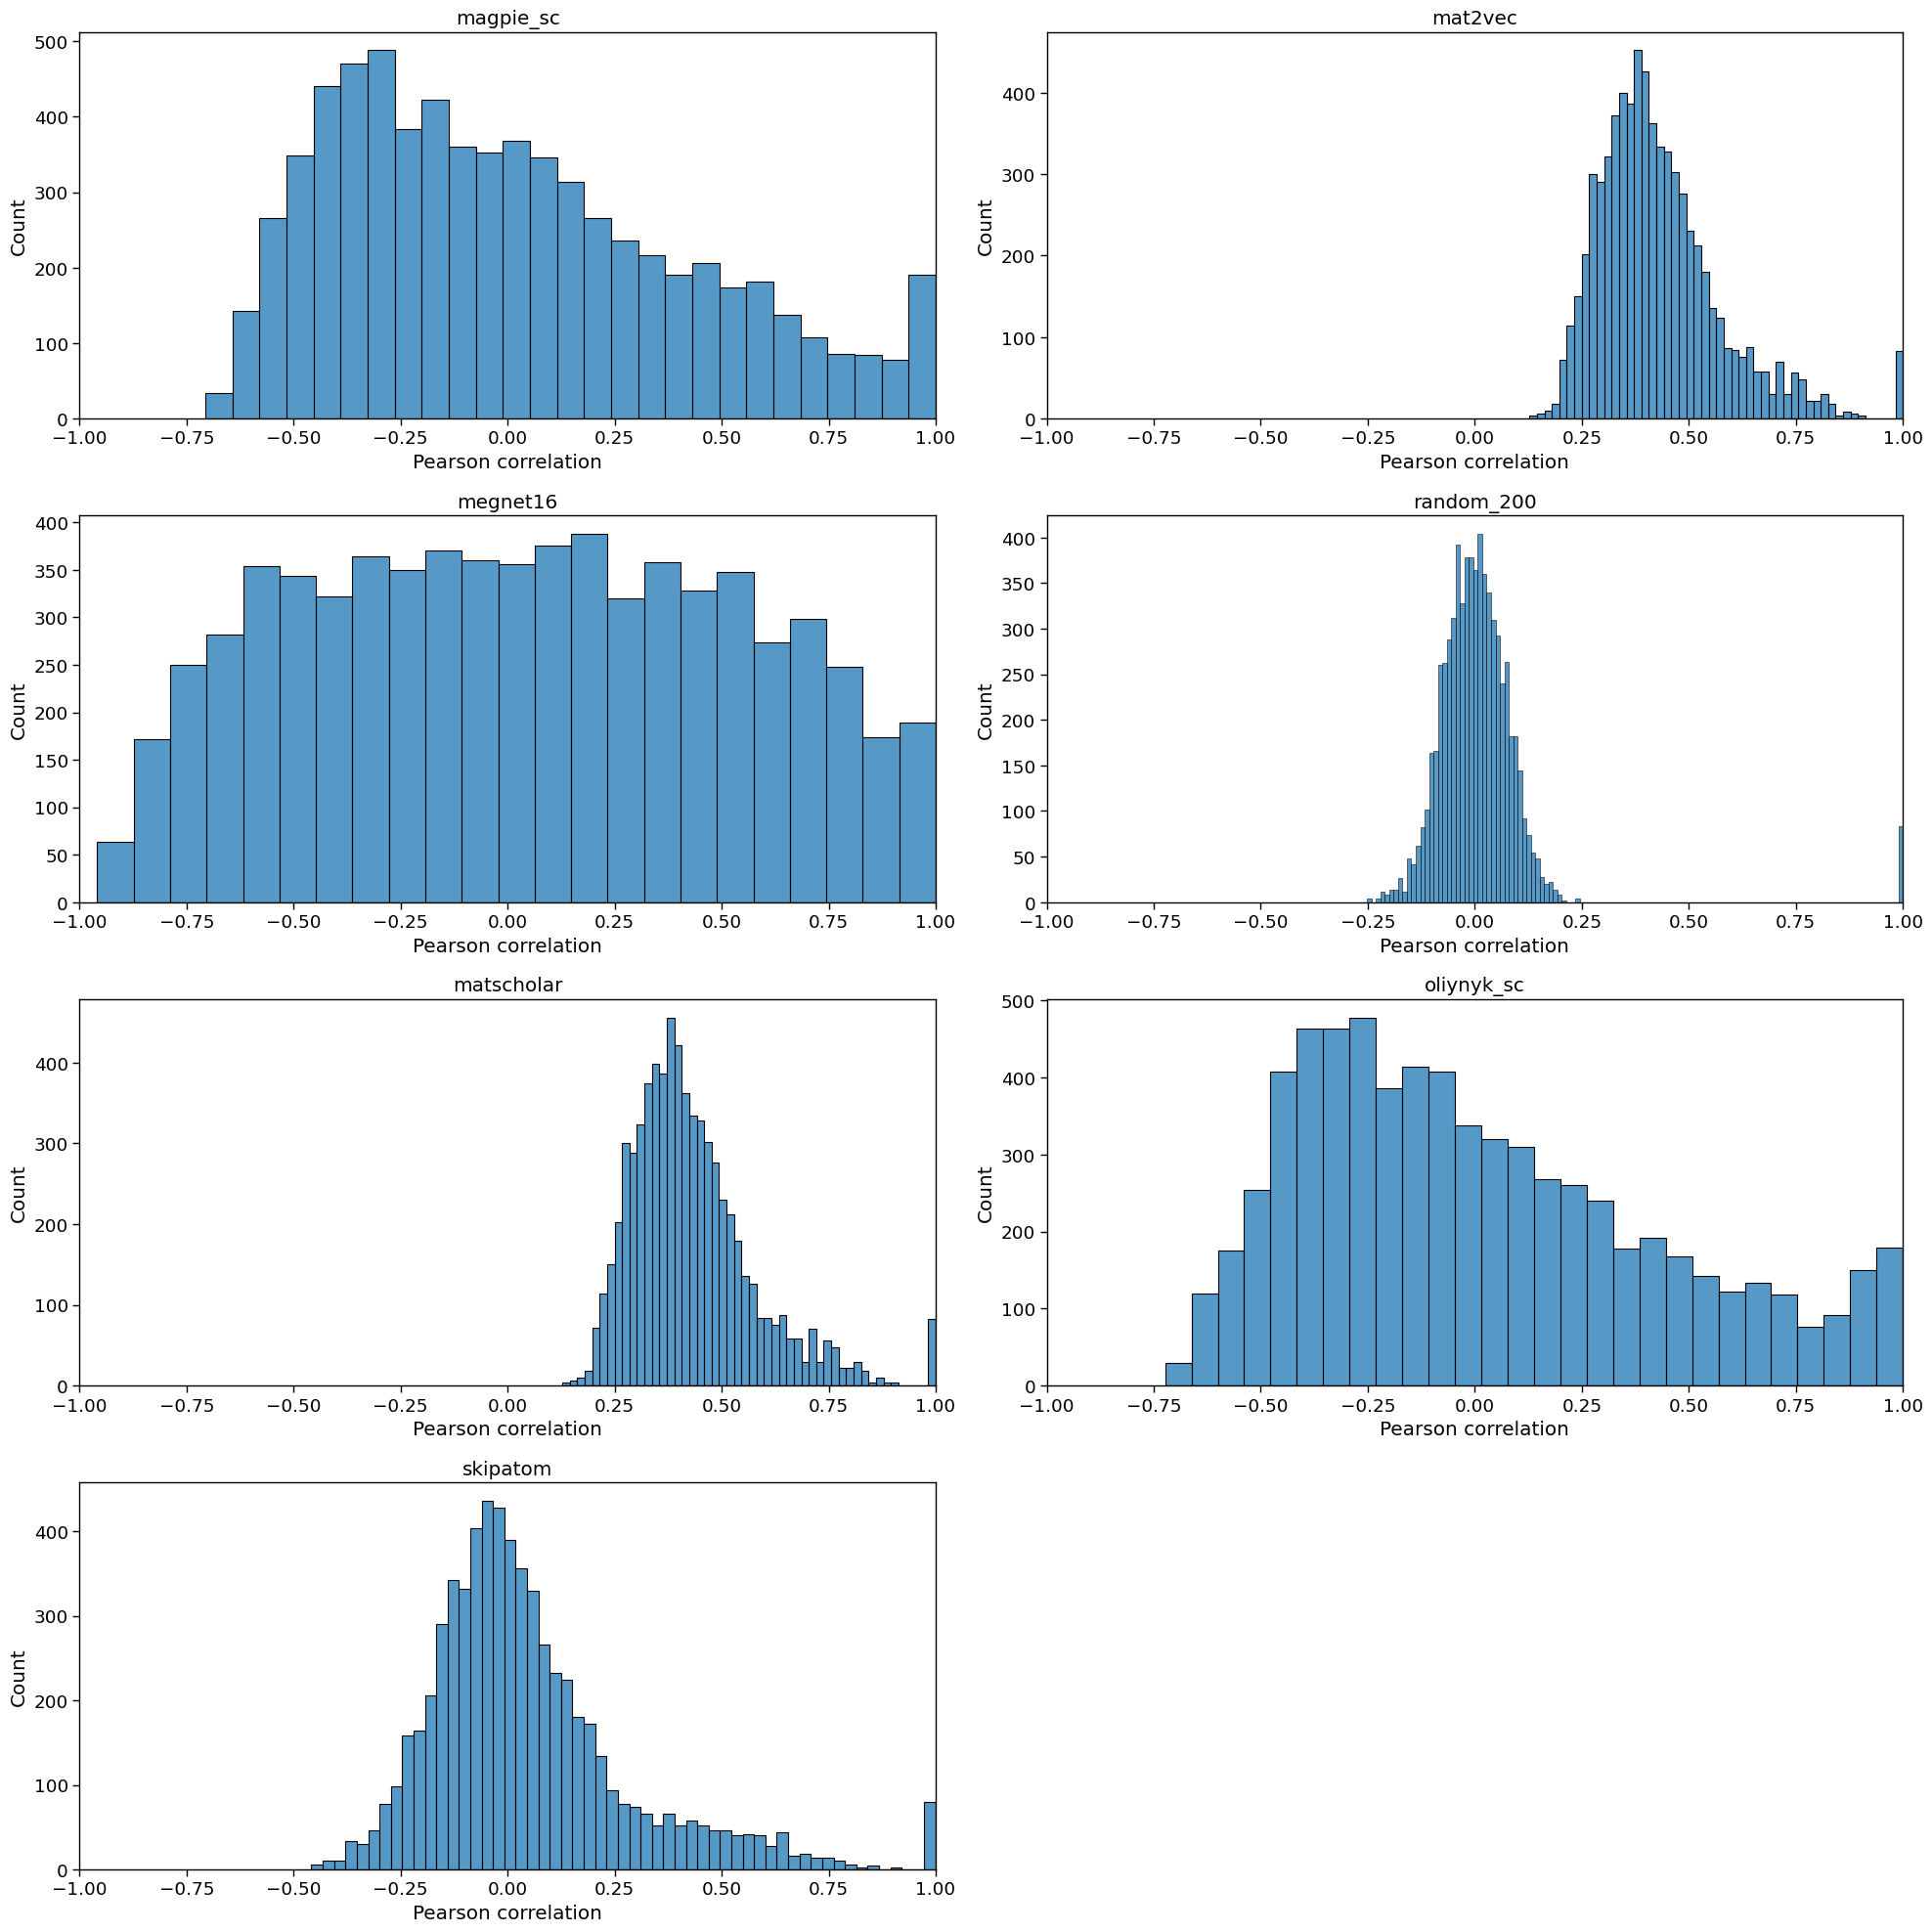

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
for ax, cbfv in zip(axes.flatten(), element_embedddings.keys()):
    sns.histplot(correlation_dfs[cbfv]["pearson"], x="pearson", ax=ax)
    ax.set_title(cbfv)
    ax.set_xlim(-1, 1)
    ax.set_xlabel("Pearson correlation")
    ax.set_ylabel("Count")

axes[-1][-1].remove()
plt.tight_layout()
plt.savefig("SI_pearson_distribution.pdf")

### Cosine similarity

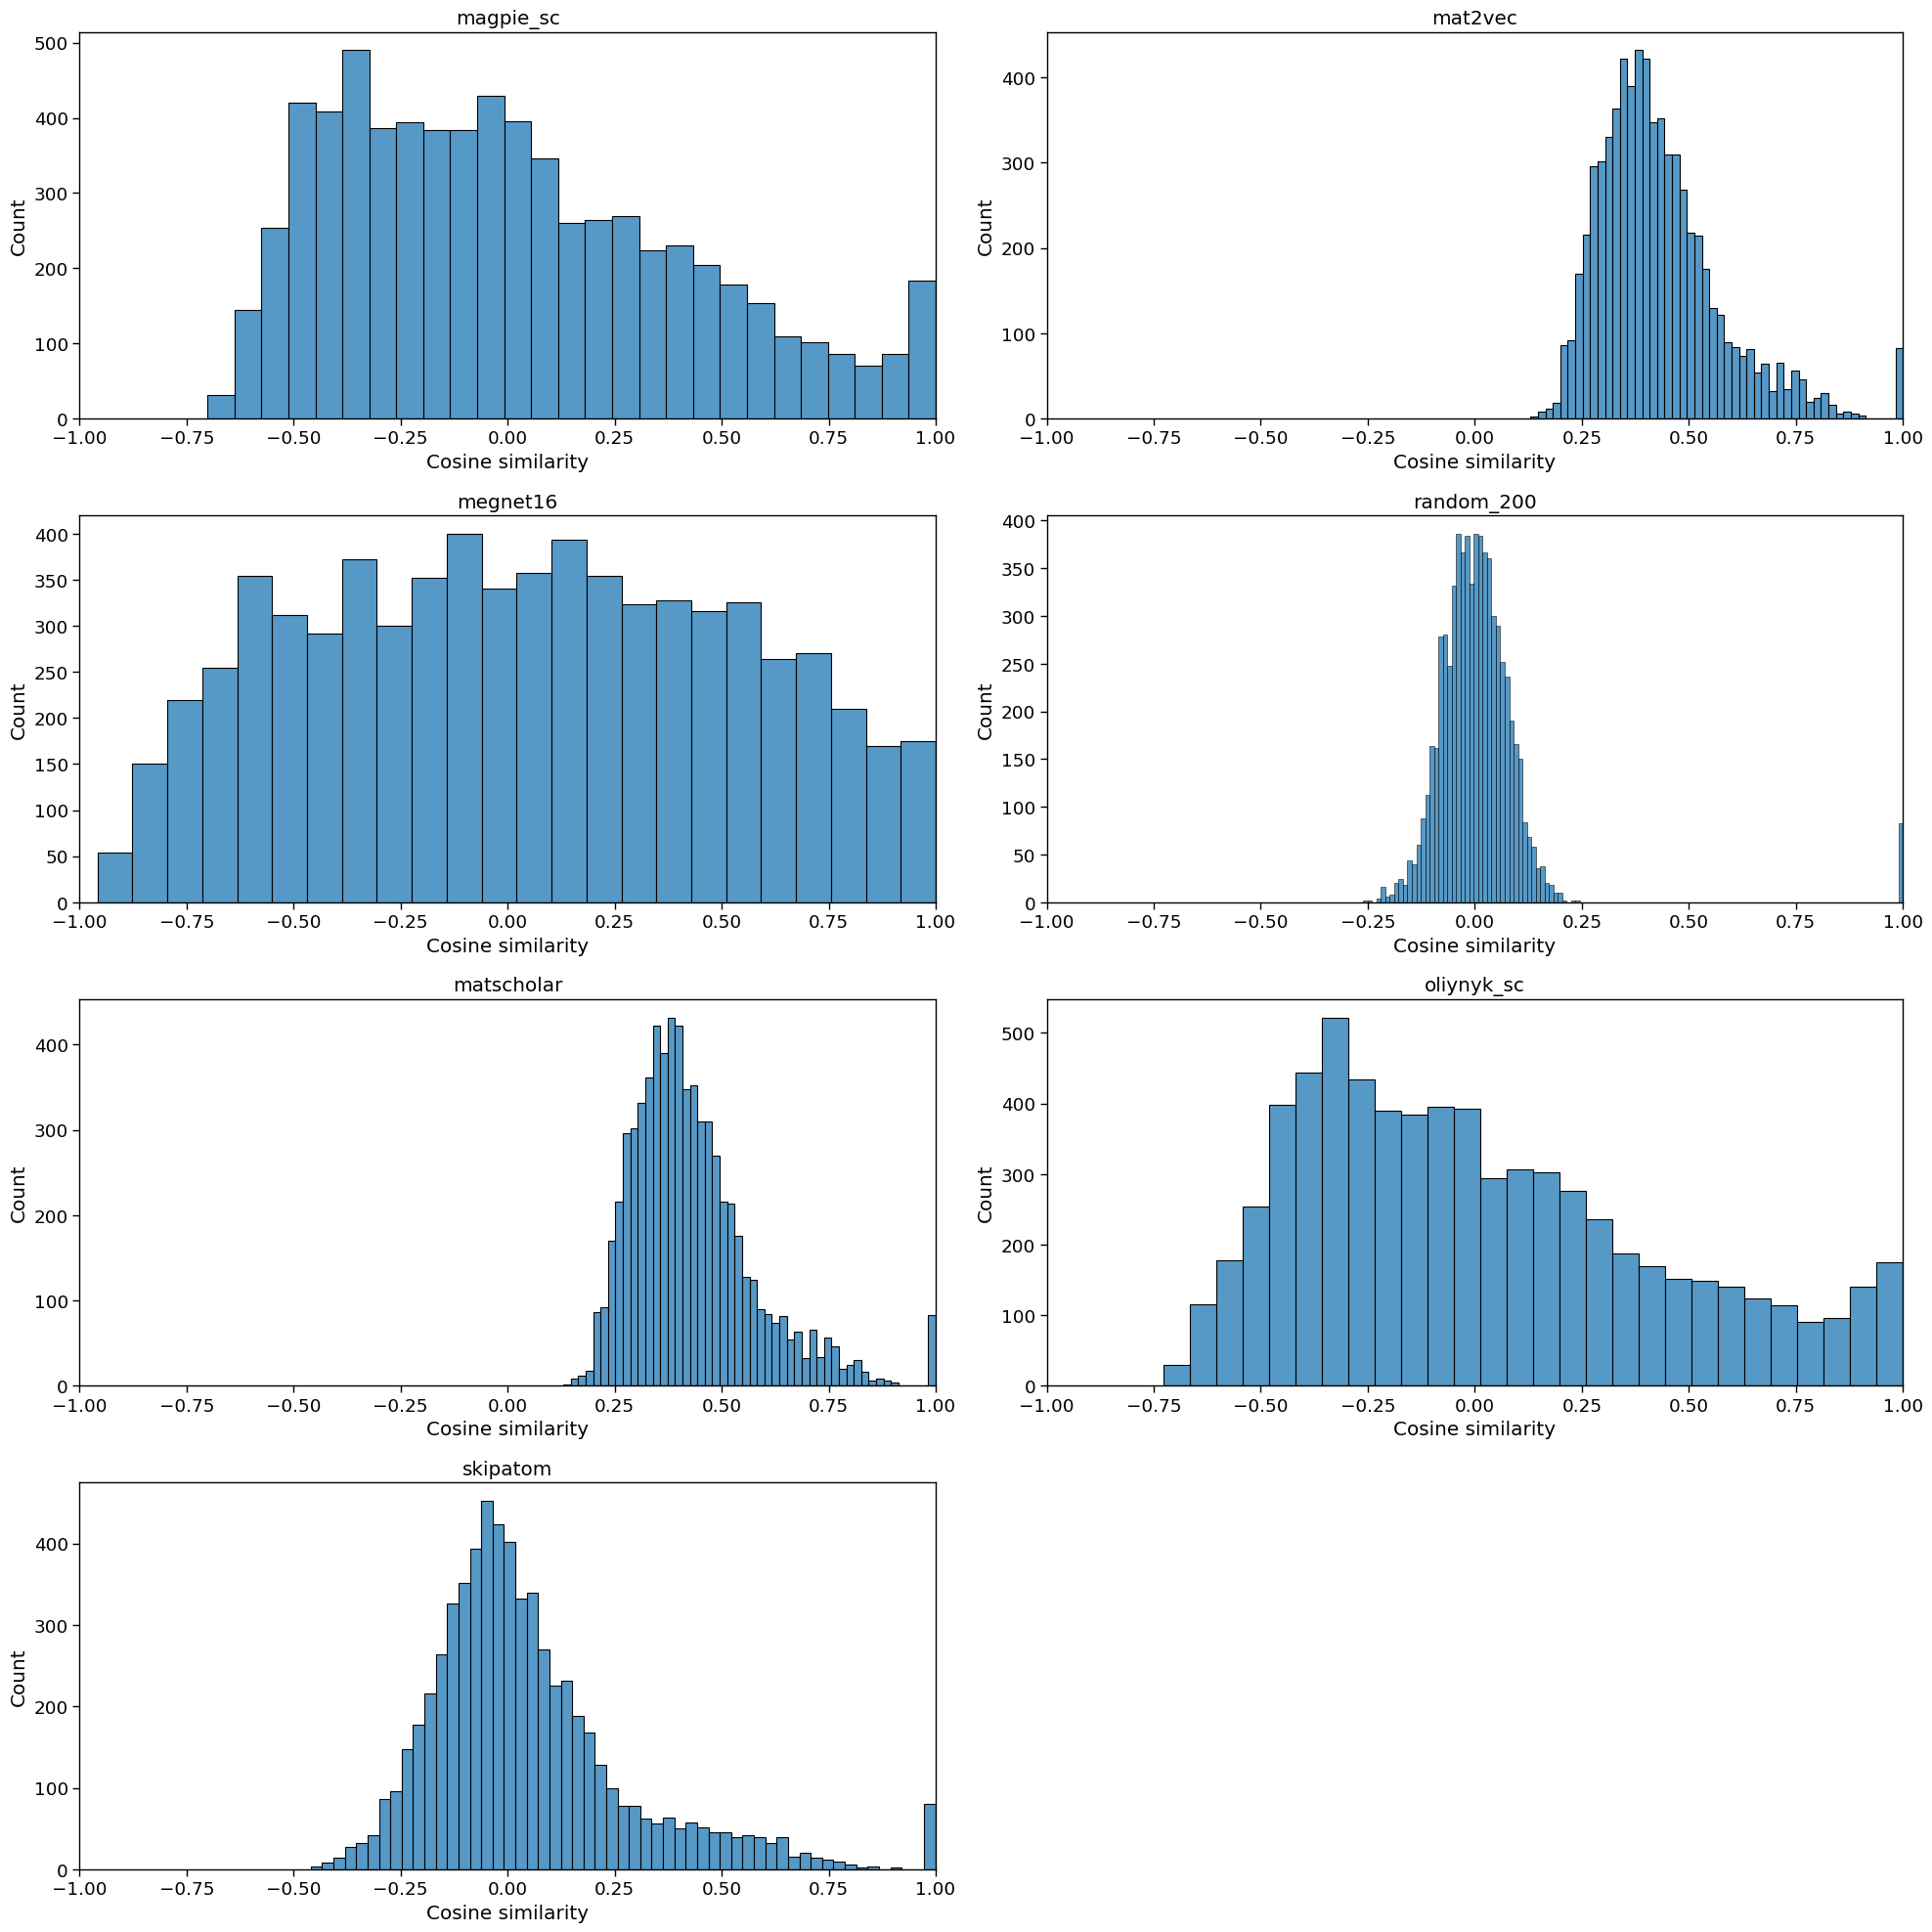

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
for ax, cbfv in zip(axes.flatten(), element_embedddings.keys()):
    sns.histplot(correlation_dfs[cbfv]["cosine_similarity"], x="cosine_similarity", ax=ax)
    ax.set_title(cbfv)
    ax.set_xlim(-1, 1)
    ax.set_xlabel("Cosine similarity")
    ax.set_ylabel("Count")

axes[-1][-1].remove()
plt.tight_layout()
plt.savefig("SI_cosine_similarity_distribution.pdf")